# MACHINE LEARNING APPLICATIONS: FINAL PROJECT


---


## **Breaking News!**




**Authors:**
- Carolina López De La Madriz (100475095)
- Álvaro Martín Ruiz (100475318)
- Jaime Salafranca Pardo (100475216)
- Emma Rodríguez Hervás (100475225)

**Course:** Machine Learning Application

---

## Overview

This project aims to apply the techniques and methodologies learned throughout the course *Machine Learning Applications* to address a relevant and socially impactful task: **detecting fake news in text documents**. The primary goal is to develop a system capable of distinguishing between real and fake news articles by considering Natual Language Processing (NLP), text vectorization techniques, and machine learning models.

The project consists of the following tasks:

• Task 1. Natural Language Processing and text vectorization

• Task 2. Machine Learning:

– Task 2.1. Classification, Regression using feature extraction or selection techniques

– Task 2.2. Clustering using feature extraction or selection techniques


• Task 3. Implementation of a dashboard using the Python Dash library.

• Task 4. Final report and presentation.

For the execution of the final project, students must choose to implement
any of the sub-Tasks 2 (either 2.1, 2.2 or 2.3), depending on their preferences
and the possibilities of the database used.


In [2]:
!pip install gensim
!pip install pyLDAvis
!pip install dash
!pip install dash_bootstrap_components
!pip install pyngrok
!pip install bertopic top2vec[torch] umap-learn hdbscan
!pip install contractions
!pip install spacy
!pip install --upgrade numpy
!pip install --upgrade gensim
!pip install --upgrade pandas
!python -m spacy download en_core_web_sm

  Using cached bertopic-0.17.0-py3-none-any.whl.metadata (23 kB)
  Using cached top2vec-1.0.36-py3-none-any.whl.metadata (22 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 

In [1]:
## after running the previous code, RESTART THE SESSION!

#  General utilities

import os
import re
import ast
import pickle
from pathlib import Path
from collections import Counter


#  Data Manipulation

import numpy as np
import pandas as pd


#  Visualization

import matplotlib.pyplot as plt
import seaborn as sns


#  Progress and Environment

from tqdm.notebook import tqdm
tqdm.pandas()


#  Web scraping / Limpieza de HTML

from bs4 import BeautifulSoup


#  NLP & text preprocessing

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
import contractions

# NLTK downloading and checking packages

def check_nltk_packages():
    packages = ['punkt', 'stopwords', 'omw-1.4', 'wordnet']
    for package in packages:
        try:
            nltk.data.find(f'tokenizers/{package}')
        except LookupError:
            nltk.download(package)
check_nltk_packages()


#  Vectorizarion & text modeling

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Doc2Vec, TfidfModel, CoherenceModel, LdaModel
from gensim.models.doc2vec import TaggedDocument
from gensim.models.phrases import Phrases
from gensim.corpora import Dictionary
import gensim.downloader as api
from gensim.matutils import corpus2dense
import pyLDAvis
import pyLDAvis.gensim_models
from bertopic import BERTopic
from top2vec import Top2Vec
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
import umap.umap_ as umap

#  Preprocessing & normalization

from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


#  Classification Models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


#  Métricas de evaluación

from sklearn.metrics import (
    classification_report, accuracy_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve,
    silhouette_score, davies_bouldin_score,
    adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score
)


#  Dimensionality Reduction

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP


#  Clustering

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering


#  Similarity

from sklearn.metrics.pairwise import cosine_similarity


#  Dash

import dash
from dash import html, dcc, Input, Output, State, dash_table
import dash_bootstrap_components as dbc


#  Other

from sklearn.utils import resample


seed = 10



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.11/dist-packages/hdbscan/plots.py:448: DeprecationWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.11/dist-packages/hdbscan/robust_single_linkage_.py:154: DeprecationWarning: invalid escape sequence '\{'
  """Perform robust single linkage clustering from a vector array
/usr/local/lib/python3.11/dist-packages/geopandas/_compat.py:7: DeprecationWarning: The 'shapely.geos' module is deprecated, and will be removed in a future version. All attributes of 'shapely.geos' are available directly from the top-level 'shapely' namespace (since shapely 2.0.0).
  import shapely.geos
/us

## DATASET

In [2]:
df_false = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')
#df = pd.read_csv('fake_or_real_news.csv')

In [3]:
print(df_false.shape)
print(df_true.shape)
#print(df.shape)

(23481, 4)
(21417, 4)


In [4]:
df_false['target'] = 1
df_true['target'] = 0
print(df_false['subject'].unique())
print(df_true['subject'].unique())
df_false.head()

df_total = pd.concat([df_false, df_true], ignore_index=True).drop(columns=['date','subject'])
df_total = df_total.sample(frac=1, random_state=seed).reset_index(drop=True)
df_total.head()

['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']
['politicsNews' 'worldnews']


title  \
0   WATCH: Republicans Disrespectfully Shout Down...   
1  Saudi Arabia says U.N. report on Yemen 'inaccu...   
2   Watch Morning Joe’s Mika DESTROY Paul Ryan Fo...   
3      House Democrats mull Pelosi leadership future   
4  BREAKING: MI Court Of Appeals Orders Vote Reco...   

                                                text  target  
0  Democrats stood up for the American people but...       1  
1  UNITED NATIONS (Reuters) - Saudi Arabia on Fri...       0  
2  Republican House Speaker Paul Ryan has been ge...       1  
3  WASHINGTON (Reuters) - U.S. House Democratic L...       0  
4  The Michigan Court of Appeals rejected Green P...       1

### PREPROCESSING AND EDA

It is relevant to understand the distribution of metadata for the news. This will be interesting to set a benchmarck which only takes easy and accesible data to be computed. As we will see with this section graph, the distribution are diferent for REAL and FAKE news.

In [5]:
df_total['text_length'] = df_total['text'].apply(len)
df_total['title_length'] = df_total['title'].apply(len)
df_total['word_count'] = df_total['text'].apply(lambda x: len(x.split()))
df_total['word_count_title'] = df_total['title'].apply(lambda x: len(x.split()))

In [6]:
print(" The amount of NAN in the dataset is ", df_total.isna().sum().sum())

 The amount of NAN in the dataset is  0


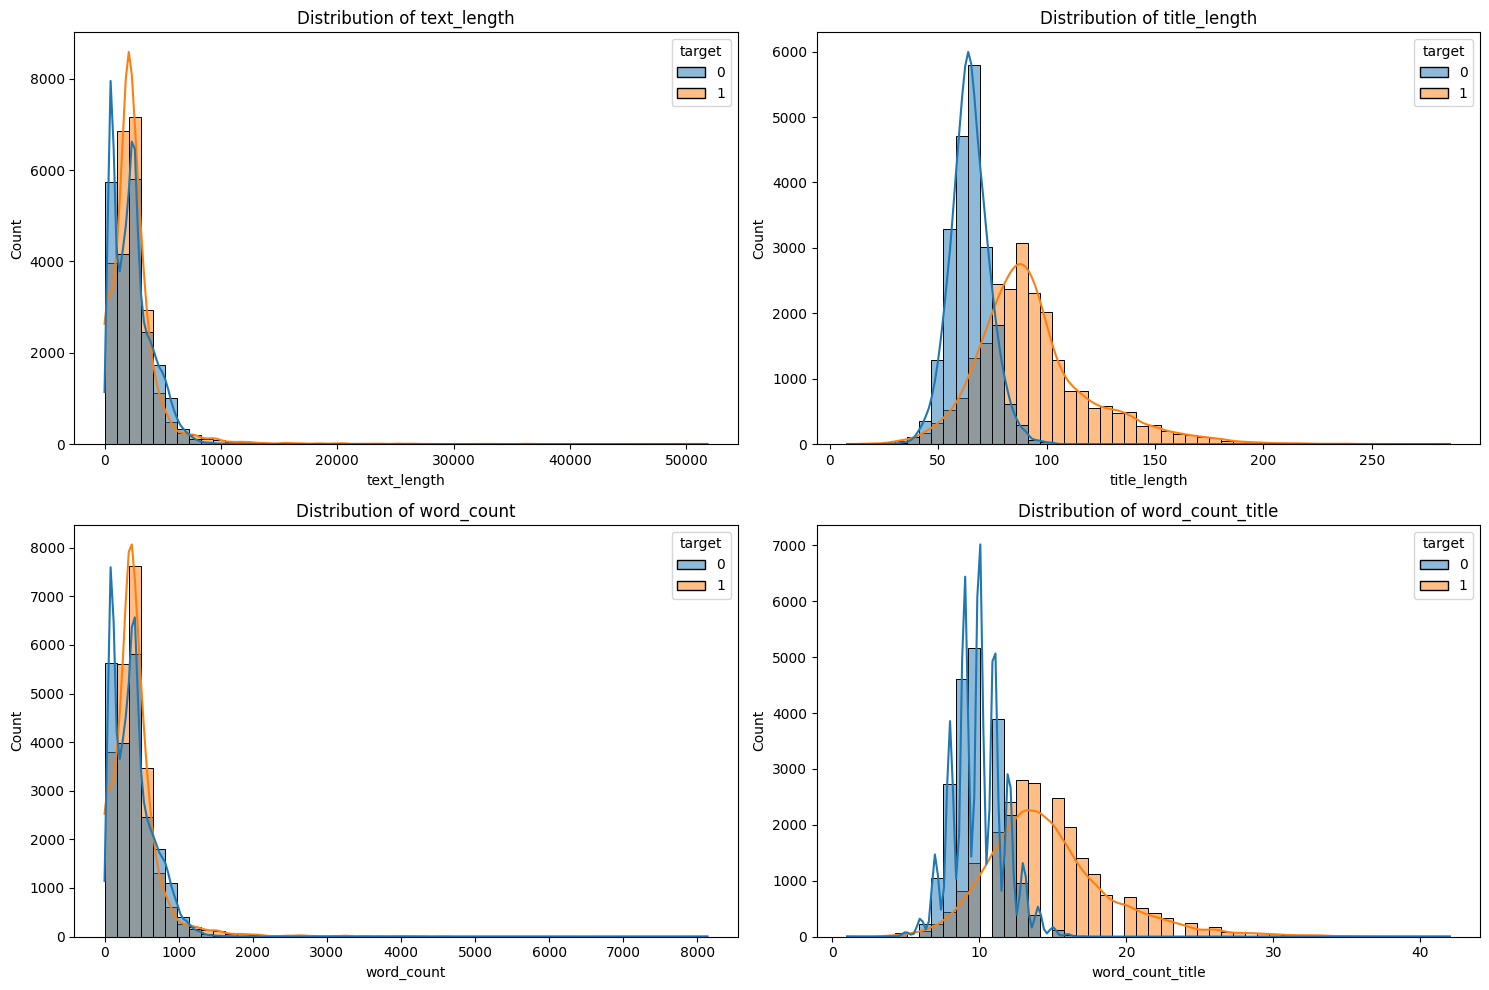

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid

columns = ['text_length', 'title_length', 'word_count', 'word_count_title']

for ax, col in zip(axes.flat, columns):
    sns.histplot(df_total, x=col, hue='target', bins=50, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

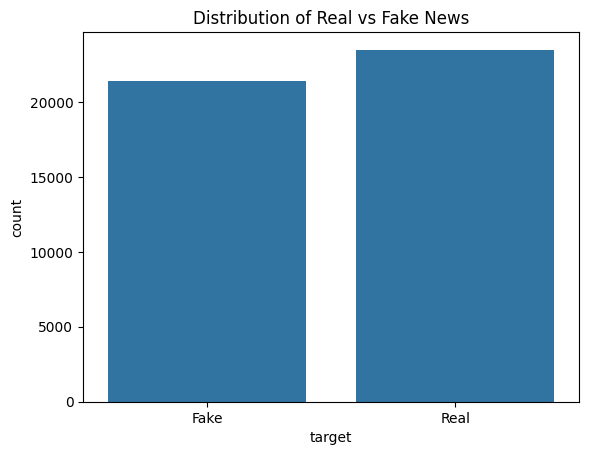

In [8]:
sns.countplot(data=df_total, x='target')
plt.title("Distribution of Real vs Fake News")
plt.xticks(ticks=[0, 1], labels=["Fake", "Real"])
plt.show()

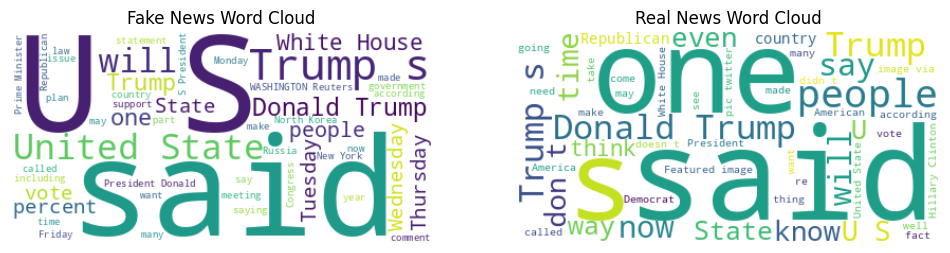

In [9]:
from wordcloud import STOPWORDS
from wordcloud import WordCloud
stopwords = set(STOPWORDS)

# Word clouds for FAKE
fake_text = " ".join(df_total[df_total['target'] == 0]['text'])
real_text = " ".join(df_total[df_total['target'] == 1]['text'])

fake_wc = WordCloud(stopwords=stopwords, background_color='white', max_words=50).generate(fake_text)
real_wc = WordCloud(stopwords=stopwords, background_color='white', max_words=50).generate(real_text)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(fake_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Fake News Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(real_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Real News Word Cloud")
plt.show()

In [10]:
unique_fake = len(set(" ".join(df_total[df_total['target'] == 0]['text']).split()))
unique_real = len(set(" ".join(df_total[df_total['target'] == 1]['text']).split()))
print(f"Fake news vocab size: {unique_fake}, Real news vocab size: {unique_real}")

Fake news vocab size: 178503, Real news vocab size: 293553


In [11]:
df_total['avg_word_len'] = df_total['text'].apply(lambda x: np.mean([len(w) for w in x.split()])) # average word length

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)




---



# **TASK 1. Text Processing and Vectorization**

## 1.1. Text processing pipeline
The first task involves preparing and transforming raw news articles into a format suitable for machine learning models. We will implement a complete text preprocessing pipeline, including:
- Tokenization
- Lowercasing
- Removal of stopwords
- Lemmatization or stemming
- Removal of punctuation, special characters, and possibly named entities

For this task, we will use libraries such as SpaCy, NLTK, and scikit-learn to automate and optimize preprocessing.



In this dataset there is a big problem with contractrion and we will try to see if we can detect the cases of 's in which we should add a ' to be able to fix the contractions.

In [12]:
nlp = spacy.load("en_core_web_sm")
wnl = WordNetLemmatizer()

broken_contractions = {
    r"\bdon t\b": "don't",
    r"\bwon t\b": "won't",
    r"\bcan t\b": "can't",
    r"\bi m\b": "I'm",
    r"\byou re\b": "you're",
    r"\bhe s\b": "he's",
    r"\bshe s\b": "she's",
    r"\bit s\b": "it's",
    r"\bwe re\b": "we're",
    r"\bthey re\b": "they're",
    r"\bthat s\b": "that's",
    r"\bthere s\b": "there's",
    r"\bwhat s\b": "what's",
    r"\s+s\s+": "'s ",
    r"\.(?![\s.])": ". "
}

In [13]:
def fix_broken_contractions(text):
    for pattern, replacement in broken_contractions.items():
        text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)
    return text


def text_preprocessing_pipeline(text):

    text = BeautifulSoup(text, 'lxml').get_text()
    text = fix_broken_contractions(text)
    text = contractions.fix(text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = text.replace("’", "'").replace("“", '"').replace("”", '"')

    doc = nlp(text)

    def is_named_entity(token):
      return token.ent_type_ != ''

    tokens = [
        token.lemma_.lower()
        for token in doc
        if (not token.is_stop and not token.is_punct and token.lemma_.isalpha()) or is_named_entity(token)
    ]


    tokens = [wnl.lemmatize(token) for token in tokens if token.isalnum()]

    return tokens

In [14]:
df_total['text'][0]

'Democrats stood up for the American people but Republicans shouted them down and voted to strip health care from millions.Senate Republicans voted to repeal the Affordable Care Act, also known as Obamacare, in the middle of the night early Thursday morning.Even though Republicans don t have any plan to replace it with, they used budget reconciliation rules to prevent Democrats from blocking the vote and took the first step toward ending critical patient and consumer protections Americans have been enjoying for a few years since the Affordable Care Act went into effect, including protections for women, young people, and people with pre-existing conditions.During the roll call vote, Democrats stood up one by one when called to voice their strenuous objections, only to be shouted down by Republicans.Senator Elizabeth Warren can be heard trying to deliver an emotional defense of the landmark healthcare law, but Republicans disrespected her and others by repeatedly declaring them to be out

In [15]:
" ".join(text_preprocessing_pipeline(df_total['text'][0]))

'democrat stand american people republican shout vote strip health care million senate republican vote repeal the affordable care act know obamacare middle the night early thursday morning republican plan replace budget reconciliation rule prevent democrat block vote take first step end critical patient consumer protection american enjoy a few year the affordable care act go effect include protection woman young people people pre existing condition roll vote democrat stand one call voice strenuous objection shout republican senator elizabeth warren hear try deliver emotional defense landmark healthcare law republican disrespect repeatedly declare order republican go pas budget resolution simple majority vote cowardly way possible order american dark video twitter al franken elizabeth warren parade democrat drown defend obamacare pic twitter com dan diamond january 12 2017ever donald trump get elect republican repeal the affordable care act priority trump claim prefer replacement ready 

In [16]:
df_total['text_tokens'] = df_total['text'].progress_apply(text_preprocessing_pipeline)
df_total['title_tokens'] = df_total['title'].progress_apply(text_preprocessing_pipeline)

  0%|          | 0/44898 [00:00<?, ?it/s]

  0%|          | 0/44898 [00:00<?, ?it/s]

Average number of tokens per title: 9.34
Average number of tokens per news: 225.21


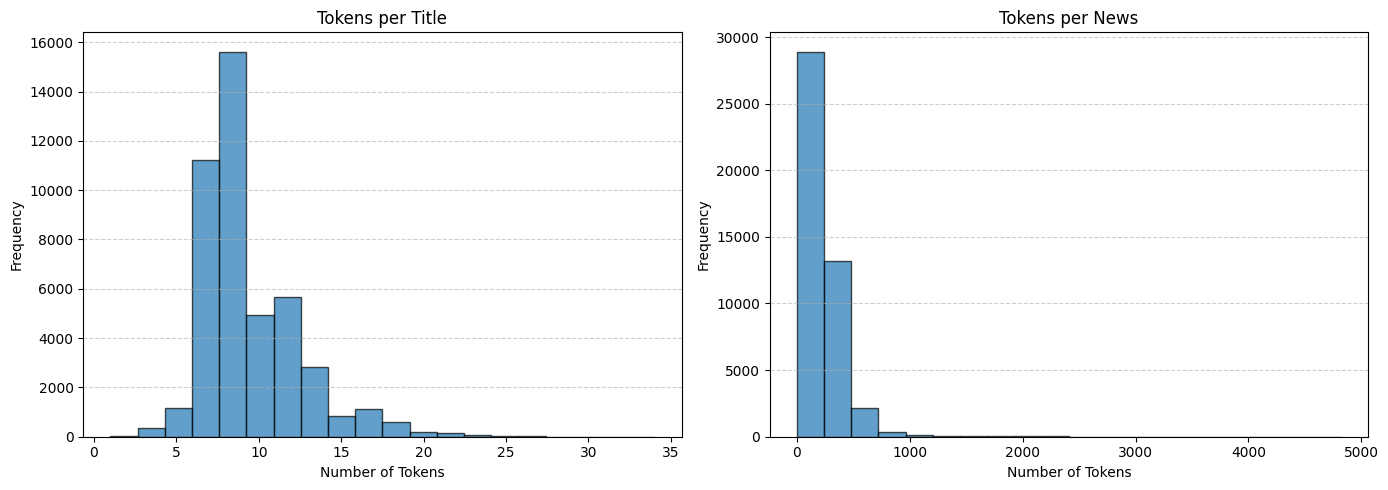

In [17]:
corpus_title = df_total['title_tokens']
num_tokens_per_title = [len(a) for a in corpus_title]
corpus = df_total['text_tokens']
num_tokens_per_review = [len(a) for a in corpus]
average_tokens_title = np.mean(num_tokens_per_title)
print(f"Average number of tokens per title: {average_tokens_title:.2f}")
average_tokens = np.mean(num_tokens_per_review)
print(f"Average number of tokens per news: {average_tokens:.2f}")


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(num_tokens_per_title, bins=20, edgecolor='black', alpha=0.7)
axes[0].set_title("Tokens per Title")
axes[0].set_xlabel("Number of Tokens")
axes[0].set_ylabel("Frequency")
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

axes[1].hist(num_tokens_per_review, bins=20, edgecolor='black', alpha=0.7)
axes[1].set_title("Tokens per News")
axes[1].set_xlabel("Number of Tokens")
axes[1].set_ylabel("Frequency")
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

We save the created dataset to be able to reuse it without running all the code.

In [18]:
df_total.to_csv('df_total.csv', index=False)

In [19]:
## from previous notebooks, to avoid executing time, we will import df_total
df_total = pd.read_csv('df_total.csv')
df_total['avg_word_len'] = df_total['text'].apply(lambda x: np.mean([len(w) for w in x.split()])) ## average word length

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [20]:
df_total['title_tokens'] = df_total['title_tokens'].apply(ast.literal_eval)
df_total['text_tokens'] = df_total['text_tokens'].apply(ast.literal_eval)

In [21]:
df_total.head()

title  \
0   WATCH: Republicans Disrespectfully Shout Down...   
1  Saudi Arabia says U.N. report on Yemen 'inaccu...   
2   Watch Morning Joe’s Mika DESTROY Paul Ryan Fo...   
3      House Democrats mull Pelosi leadership future   
4  BREAKING: MI Court Of Appeals Orders Vote Reco...   

                                                text  target  text_length  \
0  Democrats stood up for the American people but...       1         2214   
1  UNITED NATIONS (Reuters) - Saudi Arabia on Fri...       0         2531   
2  Republican House Speaker Paul Ryan has been ge...       1         2107   
3  WASHINGTON (Reuters) - U.S. House Democratic L...       0         3778   
4  The Michigan Court of Appeals rejected Green P...       1         4473   

   title_length  word_count  word_count_title  avg_word_len  \
0           106         354                14      5.254237   
1            66         396                10      5.351010   
2            86         381                14      4.482940   
3            45         618                 6      5.110032   
4           119         745                19      4.975839   

                                         text_tokens  \
0  [democrat, stand, american, people, republican...   
1  [united, nation, reuters, saudi, arabia, frida...   
2  [republican, house, speaker, paul, ryan, getti...   
3  [washington, reuters, house, democratic, leade...   
4  [the, michigan, court, of, appeal, reject, gre...   

                                        title_tokens  
0  [watch, republican, disrespectfully, shout, el...  
1  [saudi, arabia, say, report, yemen, inaccurate...  
2  [watch, morning, joe, mika, destroy, paul, rya...  
3  [house, democrat, mull, pelosi, leadership, fu...  
4  [breaking, mi, court, of, appeal, order, vote,...

It is important to detect N gramns in this case we will  take groups of two words this could be very interesting for example for names Like Donald Trump or Hilary Clinton.

Then to frequent word and not frequent ones will also be removed, finally we will have a cleaned corpus and dictionarry for vectorization. All this is done diferently for titles and texts.

In [22]:
phrase_model = Phrases((df_total['text_tokens']), min_count=2, threshold=20)
corpus = [el for el in phrase_model[df_total['text_tokens']]]
df_total['clean_text'] = corpus

phrase_model = Phrases(df_total['title_tokens'], min_count=2, threshold=20)
corpus = [el for el in phrase_model[df_total['title_tokens']]]
df_total['clean_title'] = corpus


In [23]:
df_total.head(10)

title  \
0   WATCH: Republicans Disrespectfully Shout Down...   
1  Saudi Arabia says U.N. report on Yemen 'inaccu...   
2   Watch Morning Joe’s Mika DESTROY Paul Ryan Fo...   
3      House Democrats mull Pelosi leadership future   
4  BREAKING: MI Court Of Appeals Orders Vote Reco...   
5  U.S. NEWS and WORLD REPORT Publishes List Of T...   
6  Obama to meet Philippines' Duterte, broach hum...   
7  U.S. anti-missile system 'should be decision f...   
8  HILLARY CLINTON STREET ART APPEARS IN LOS ANGE...   
9  Saudi Arabia's advisory council studying propo...   

                                                text  target  text_length  \
0  Democrats stood up for the American people but...       1         2214   
1  UNITED NATIONS (Reuters) - Saudi Arabia on Fri...       0         2531   
2  Republican House Speaker Paul Ryan has been ge...       1         2107   
3  WASHINGTON (Reuters) - U.S. House Democratic L...       0         3778   
4  The Michigan Court of Appeals rejected Green P...       1         4473   
5  More than 21,000 people from all regions of th...       1         1477   
6  WASHINGTON (Reuters) - U.S. President Barack O...       0          992   
7  SEOUL (Reuters) - The spokesman for the front ...       0          566   
8  You know those really tacky air fresheners you...       1         1055   
9  RIYADH (Reuters) - Saudi Arabia s Shura Counci...       0         1820   

   title_length  word_count  word_count_title  avg_word_len  \
0           106         354                14      5.254237   
1            66         396                10      5.351010   
2            86         381                14      4.482940   
3            45         618                 6      5.110032   
4           119         745                19      4.975839   
5           100         230                18      5.369565   
6            55         161                 8      5.161491   
7            78          89                11      5.359551   
8            68         170                10      5.200000   
9            76         285                 9      5.371930   

                                         text_tokens  \
0  [democrat, stand, american, people, republican...   
1  [united, nation, reuters, saudi, arabia, frida...   
2  [republican, house, speaker, paul, ryan, getti...   
3  [washington, reuters, house, democratic, leade...   
4  [the, michigan, court, of, appeal, reject, gre...   
5  [more, than, people, region, world, participat...   
6  [washington, reuters, president, barack, obama...   
7  [seoul, reuters, spokesman, runner, south, kor...   
8  [know, tacky, air, freshener, cab, yea, street...   
9  [riyadh, reuters, saudi, arabia, shura, counci...   

                                        title_tokens  \
0  [watch, republican, disrespectfully, shout, el...   
1  [saudi, arabia, say, report, yemen, inaccurate...   
2  [watch, morning, joe, mika, destroy, paul, rya...   
3  [house, democrat, mull, pelosi, leadership, fu...   
4  [breaking, mi, court, of, appeal, order, vote,...   
5  [news, world, report, publishes, list, 10, pop...   
6  [obama, meet, philippine, duterte, broach, hum...   
7  [anti, missile, system, decision, south, korea...   
8  [hillary, clinton, street, art, appear, los, a...   
9  [saudi, arabia, advisory, council, study, prop...   

                                          clean_text  \
0  [democrat, stand, american, people, republican...   
1  [united_nation, reuters, saudi_arabia, friday,...   
2  [republican, house_speaker, paul_ryan, getting...   
3  [washington_reuters, house, democratic, leader...   
4  [the, michigan, court, of_appeal, reject, gree...   
5  [more_than, people, region, world, participate...   
6  [washington_reuters, president_barack, obama, ...   
7  [seoul_reuters, spokesman, runner, south_korea...   
8  [know, tacky, air_freshener, cab, yea, street_...   
9  [riyadh, reuters, saudi_arabia, shura_council,...   

                                     

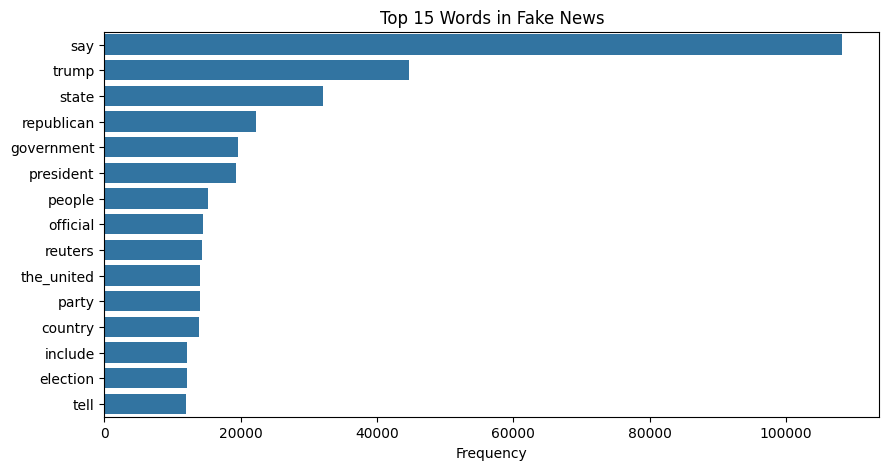

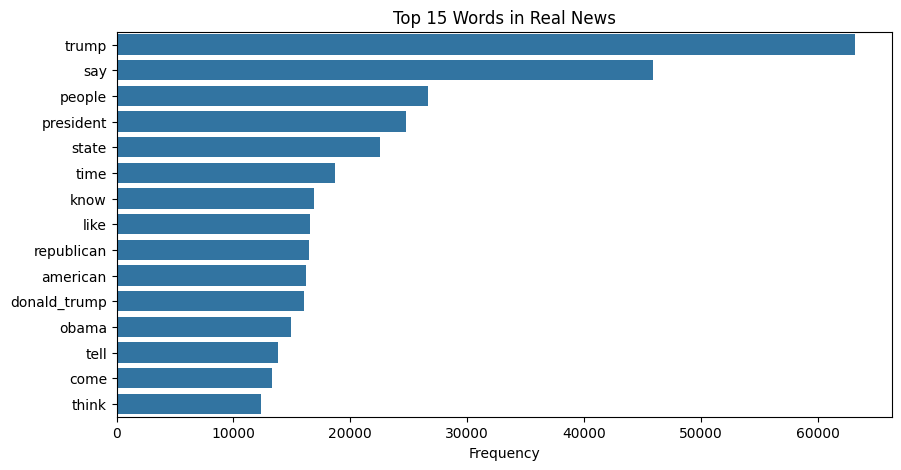

In [24]:
def get_top_n_words(corpus, n=20):
    corpus = [' '.join(tokens) for tokens in corpus]
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]


# Top words for each class
top_fake = get_top_n_words(df_total[df_total['target'] == 0]['clean_text'], n=15)
top_real = get_top_n_words(df_total[df_total['target'] == 1]['clean_text'], n=15)


# Plotting
def plot_top_words(word_freq, title):
    words, counts = zip(*word_freq)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(title)
    plt.xlabel("Frequency")
    plt.show()


plot_top_words(top_fake, "Top 15 Words in Fake News")
plot_top_words(top_real, "Top 15 Words in Real News")

Dictionary creation for title and text

In [115]:
title_dictionary = Dictionary(df_total['clean_title'])
text_dictionary = Dictionary(df_total['clean_text'])

# Eliminar palabras poco frecuentes (con un umbral de frecuencia)
title_dictionary.filter_extremes(no_below=2, no_above=0.7)
text_dictionary.filter_extremes(no_below=2, no_above=0.7)


In [26]:
corpus_def = []
for sent in df_total['clean_text']:
  aux = [token for token in sent if token in text_dictionary.token2id.keys()]
  corpus_def.append(aux)

df_total['clean_text'] = corpus_def

corpus_def = []
for sent in df_total['clean_title']:
  aux = [token for token in sent if token in text_dictionary.token2id.keys()]
  corpus_def.append(aux)

df_total['clean_title'] = corpus_def

In [27]:
df_total['clean_text_str'] = df_total['clean_text'].apply(lambda x: ' '.join(x))
df_total['clean_title_str'] = df_total['clean_title'].apply(lambda x: ' '.join(x))

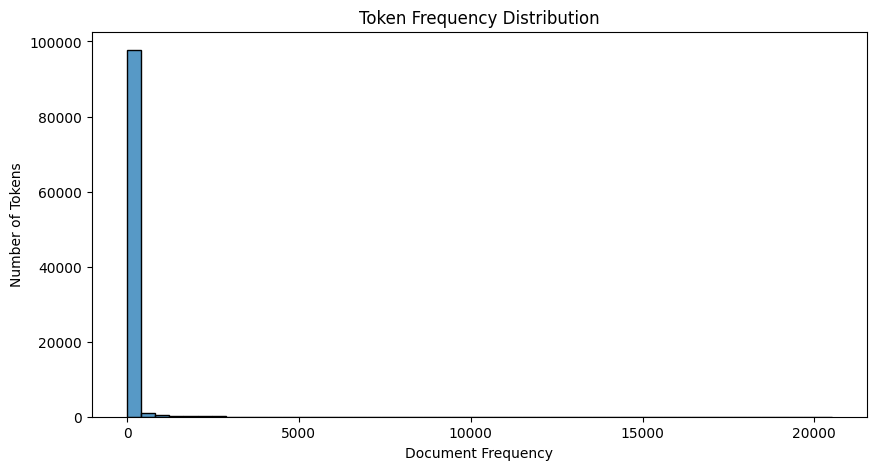

In [28]:
word_freq = list(text_dictionary.dfs.values())
plt.figure(figsize=(10, 5))
sns.histplot(word_freq, bins=50)
plt.title("Token Frequency Distribution")
plt.xlabel("Document Frequency")
plt.ylabel("Number of Tokens")
plt.show()


In [29]:
all_tokens = [token for tokens in df_total['clean_text'] for token in tokens]
total_tokens = len(all_tokens)
unique_tokens = len(set(all_tokens))
hapax = sum(1 for token, freq in Counter(all_tokens).items() if freq == 1)

print(f"Lexical diversity: {unique_tokens / total_tokens:.4f}")
print(f"Hapax legomena (words appearing once): {hapax}")

Lexical diversity: 0.0120
Hapax legomena (words appearing once): 0


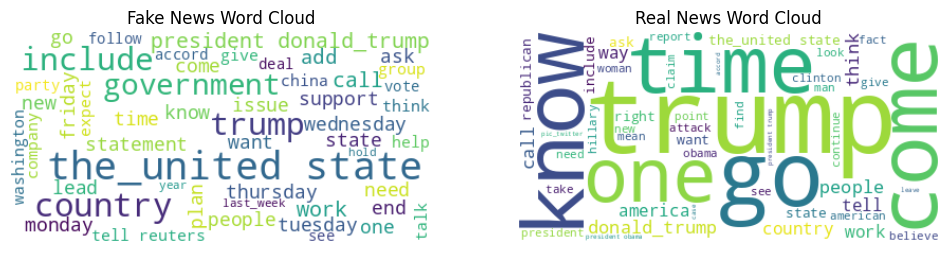

In [30]:
from wordcloud import STOPWORDS
from wordcloud import WordCloud
stopwords = set(STOPWORDS)

# Word clouds for FAKE
fake_text = " ".join([" ".join(tokens) for tokens in df_total[df_total['target'] == 0]['clean_text']]) # Join the tokens within each list before joining the lists
real_text = " ".join([" ".join(tokens) for tokens in df_total[df_total['target'] == 1]['clean_text']]) # Join the tokens within each list before joining the lists


fake_wc = WordCloud(stopwords=stopwords, background_color='white', max_words=50).generate(fake_text)
real_wc = WordCloud(stopwords=stopwords, background_color='white', max_words=50).generate(real_text)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(fake_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Fake News Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(real_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Real News Word Cloud")
plt.show()

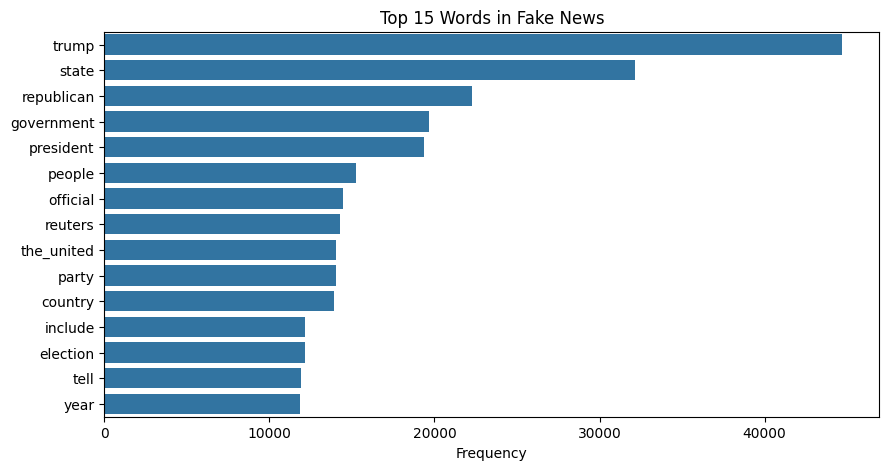

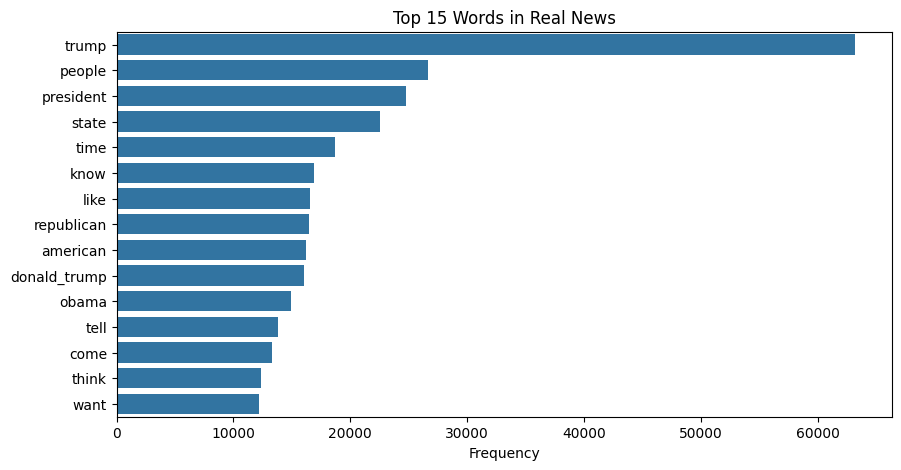

In [31]:
def get_top_n_words(corpus, n=20):
    corpus = [' '.join(tokens) for tokens in corpus]
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]


# Top words for each class
top_fake = get_top_n_words(df_total[df_total['target'] == 0]['clean_text'], n=15)
top_real = get_top_n_words(df_total[df_total['target'] == 1]['clean_text'], n=15)


# Plotting
def plot_top_words(word_freq, title):
    words, counts = zip(*word_freq)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(title)
    plt.xlabel("Frequency")
    plt.show()


plot_top_words(top_fake, "Top 15 Words in Fake News")
plot_top_words(top_real, "Top 15 Words in Real News")

In [32]:
df_total.to_csv('df_total.csv', index=False)

In [33]:
df_total_aux = df_total.copy()
df_total = df_total.iloc[:1000]
df_total.shape

(1000, 14)

## 1.2. Vectorization

**1. Bag of words vectorization**

Bag of Words is a simple yet effective vectorization method that converts a document into a fixed-length vector by counting the occurrences of each word in a predefined vocabulary. This technique ignores word order and semantics but is useful for traditional machine learning models. Here, we apply BoW using Gensim’s doc2bow on both titles and full news texts, producing sparse representations of word frequencies.

In [34]:
# Convert the list of tokens in each row to a single string before joining
X_bow = [text_dictionary.doc2bow(text) for text in df_total['clean_text']]
X_bow_title =  [title_dictionary.doc2bow(text) for text in df_total['clean_title']]

**2. TFIDF vectorization**

Term Frequency - Inverse Document Frequency:
TF-IDF improves upon BoW by reducing the weight of common words and increasing the importance of rare but meaningful terms. The Term Frequency (TF) measures how frequently a term appears in a document, while the Inverse Document Frequency (IDF) penalizes terms that appear in many documents. We apply TfidfModel to the BoW corpus to generate more discriminative document vectors.

In [35]:
tfidf_model = TfidfModel(X_bow)
text_corpus_tfidf = tfidf_model[X_bow]

tfidf_model_title = TfidfModel(X_bow_title)
title_corpus_tfidf = tfidf_model_title[X_bow_title]


**3. Doc2Vec Vectorization**

Doc2Vec is an extension of Word2Vec that generates dense, fixed-length vectors representing entire documents. It considers word context and document-level semantics by training embeddings jointly with document identifiers. We trained separate models for titles and texts using Gensim's Doc2Vec, and inferred document embeddings which we store in doc2vec_text_df and doc2vec_title_df.

In [36]:
# Use directly the preprocessed tokens
text_documents = [TaggedDocument(words=tokens, tags=[f"text_{i}"]) for i, tokens in enumerate(df_total['clean_text'])]
title_documents = [TaggedDocument(words=tokens, tags=[f"title_{i}"]) for i, tokens in enumerate(df_total['clean_title'])]

# Train Doc2Vec model for texts
doc2vec_model_text = Doc2Vec(vector_size=100, window=5, min_count=2, workers=4, epochs=20)
doc2vec_model_text.build_vocab(text_documents)
doc2vec_model_text.train(text_documents, total_examples=doc2vec_model_text.corpus_count, epochs=doc2vec_model_text.epochs)

# Train Doc2Vec model for titles
doc2vec_model_title = Doc2Vec(vector_size=50, window=3, min_count=2, workers=4, epochs=20)
doc2vec_model_title.build_vocab(title_documents)
doc2vec_model_title.train(title_documents, total_examples=doc2vec_model_title.corpus_count, epochs=doc2vec_model_title.epochs)

# Infere vectors for each document
text_doc_vectors = [doc2vec_model_text.infer_vector(tokens) for tokens in df_total['clean_text']]
title_doc_vectors = [doc2vec_model_title.infer_vector(tokens) for tokens in df_total['clean_title']]

# DataFrames converted for the analysis or modeling
import pandas as pd
doc2vec_text_df = pd.DataFrame(text_doc_vectors).add_prefix("text_d2v_")
doc2vec_title_df = pd.DataFrame(title_doc_vectors).add_prefix("title_d2v_")

#df_total = pd.concat([df_total.reset_index(drop=True), doc2vec_text_df, doc2vec_title_df], axis=1)

print("Doc2Vec vectorization completa. Nuevas columnas añadidas al DataFrame.")



Doc2Vec vectorization completa. Nuevas columnas añadidas al DataFrame.


**4. GloVe Vectorization**

Global Vectors for word representation:
GloVe is a pretrained word embedding model that captures semantic similarity by factorizing a word co-occurrence matrix. We average the GloVe vectors of words in each document to obtain a dense representation. We use the glove-wiki-gigaword-50 pretrained model from Gensim’s API to vectorize both titles and texts.

In [37]:
glove_model = api.load("glove-wiki-gigaword-50")



def get_doc_vector(tokens):
    vectors = [glove_model[word] for word in tokens if word in glove_model]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(glove_model.vector_size)

# Obtain GloVe vectors for titles and text
X_glove = np.vstack(df_total['clean_text'].progress_apply(get_doc_vector))
X_glove = normalize(X_glove)

X_glove_titles = np.vstack(df_total['clean_title'].progress_apply(get_doc_vector))
X_glove_titles = normalize(X_glove_titles)

print("GloVe Vectors for Titles:")
print(X_glove_titles)

print("GloVe Vectors for Texts:")
print(X_glove)


[==================================================] 100.0% 66.0/66.0MB downloaded


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

GloVe Vectors for Titles:
[[-0.0440387  -0.10031213  0.1350596  ... -0.04193314 -0.01893296
   0.06135872]
 [ 0.09428258 -0.21684612  0.0704997  ...  0.43056628  0.24770486
  -0.00795202]
 [ 0.04191677 -0.02812768  0.22524281 ... -0.02278147 -0.00981249
   0.03783484]
 ...
 [-0.1246494  -0.04404839 -0.01603226 ...  0.19592182 -0.03461692
   0.10347275]
 [ 0.21625629  0.08904993  0.11841448 ...  0.27940708 -0.2770579
   0.07054243]
 [ 0.05348916 -0.10651506 -0.10461035 ...  0.04939139 -0.02475584
   0.07015786]]
GloVe Vectors for Texts:
[[ 0.00172401 -0.01102689  0.0440253  ... -0.01208985  0.0037609
   0.09190548]
 [ 0.10307536 -0.01555879  0.06075974 ...  0.12101764  0.00693875
  -0.02727407]
 [-0.0102116   0.05089243  0.04484629 ...  0.04704005  0.02366392
   0.10814862]
 ...
 [ 0.03076016  0.04439445  0.04839934 ...  0.12489311  0.01595998
   0.07501552]
 [ 0.10064155  0.07242804  0.03281405 ...  0.14860339 -0.07962244
  -0.03203447]
 [ 0.01996248  0.05417289  0.0044137  ...  0.0917

**5. Product2Vec Vectorization**

Prod2Vec is a document embedding approach buil on Word2Vec. It learns dense, fixed-length representations by training word embedding directly on the corpus and averaging them per document. We use a sliding context window to capture local semantics. We average the all words in each document and normalize the resulting vectors.

In [38]:
from gensim.models import Word2Vec
from sklearn.preprocessing import normalize

In [39]:
# Train Word2Vec on the preprocessed text tokens
prod2v_text = Word2Vec(
    sentences=df_total['clean_text'],
    vector_size=100,
    window=5,
    min_count=2,
    workers=4,
    epochs=20
)

# Train on the preprocessed titles
prod2v_title = Word2Vec(
    sentences=df_total['clean_title'],
    vector_size=50,
    window=3,
    min_count=2,
    workers=4,
    epochs=20
)

# Average word vectors into a document vector
def avg_text_vector(tokens):
    vectors = []
    for token in tokens:
        if token in prod2v_text.wv:
            vectors.append(prod2v_text.wv[token])
    if len(vectors) > 0:
        # compute the mean of all  vectors
        return np.mean(vectors, axis=0)
    else:
        # if no token was found return a zero-vector
        return np.zeros(prod2v_text.vector_size)

# Same function for titles
def avg_title_vector(tokens):
    vectors = []
    for token in tokens:
        if token in prod2v_title.wv:
            vectors.append(prod2v_title.wv[token])
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(prod2v_title.vector_size)

# Build and normalize
X_prod2vec_text = normalize(
    np.vstack(df_total['clean_text'].progress_apply(avg_text_vector))
)
X_prod2vec_title = normalize(
    np.vstack(df_total['clean_title'].progress_apply(avg_title_vector))
)

print("Product2Vec Text shape:", X_prod2vec_text.shape)
print("Product2Vec Title shape:", X_prod2vec_title.shape)



  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Product2Vec Text shape: (1000, 100)
Product2Vec Title shape: (1000, 50)


### **LDA *Analysis* (Latent Dirichlet Allocation for Topic Modeling)**

LDA is a generative probabilistic model that assumes each document is a mixture of topics, and each topic is a distribution over words. We used Gensim’s LdaModel to train topic models on both BoW and TF-IDF representations and evaluated them using coherence scores. This allows us to uncover the main themes across the dataset.

#### **LDA for Text**

In [40]:

def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus,
                                id2word=dictionary,
                                num_topics=num_topics,
                                random_state=42,
                                passes=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Define range of topics
start = 2
limit = 15
step = 2


# Compute coherence for BoW
lda_models_bow, coherence_bow = compute_coherence_values(dictionary=text_dictionary,
                                                         corpus=X_bow,
                                                         start=start,
                                                         limit=limit,
                                                         step=step,
                                                         texts=df_total['clean_text'])

# Compute coherence for TF-IDF
lda_models_tfidf, coherence_tfidf = compute_coherence_values(dictionary=text_dictionary,
                                                             corpus=text_corpus_tfidf,
                                                             start=start,
                                                             limit=limit,
                                                             step=step,
                                                             texts=df_total['clean_text'])

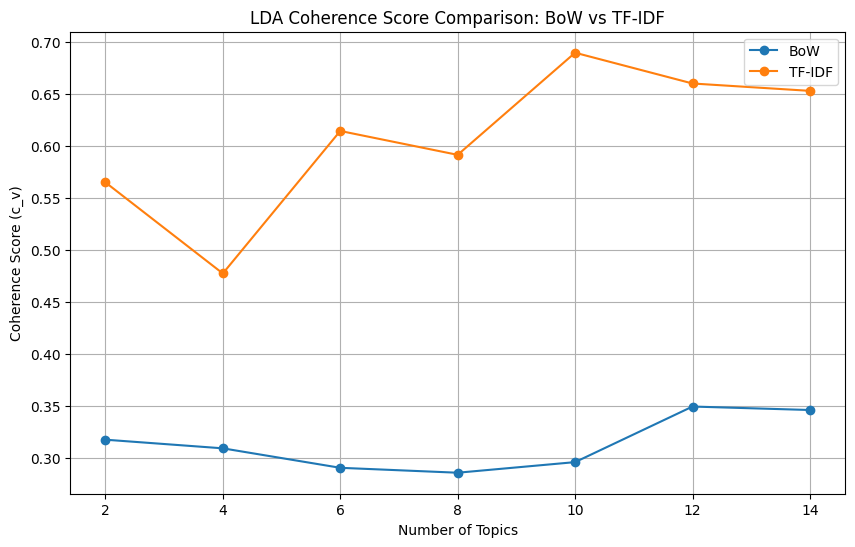

In [41]:
x = range(start, limit, step)
plt.figure(figsize=(10, 6))
plt.plot(x, coherence_bow, label="BoW", marker='o')
plt.plot(x, coherence_tfidf, label="TF-IDF", marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (c_v)")
plt.legend()
plt.title("LDA Coherence Score Comparison: BoW vs TF-IDF")
plt.grid(True)
plt.show()

In [42]:
best_idx = coherence_tfidf.index(max(coherence_tfidf))  # or coherence_tfidf
best_model = lda_models_tfidf[best_idx]  # or lda_models_tfidf[best_idx]

best_model.print_topics(num_words=10)


[(0,
  '0.002*"trump" + 0.001*"republican" + 0.001*"clinton" + 0.001*"state" + 0.001*"president" + 0.001*"people" + 0.001*"party" + 0.001*"obama" + 0.001*"vote" + 0.001*"country"'),
 (1,
  '0.000*"cuban" + 0.000*"isaac" + 0.000*"february_21" + 0.000*"goodman" + 0.000*"airline" + 0.000*"tribe" + 0.000*"varela" + 0.000*"idlib" + 0.000*"female_sailor" + 0.000*"october_26"'),
 (2,
  '0.000*"xi" + 0.000*"nunes" + 0.000*"gun_control" + 0.000*"beijing" + 0.000*"convention" + 0.000*"transgender" + 0.000*"kintner" + 0.000*"maxine_water" + 0.000*"atlanta" + 0.000*"schumer"'),
 (3,
  '0.000*"hannity" + 0.000*"dance" + 0.000*"december_26" + 0.000*"robin_williams" + 0.000*"mugabe" + 0.000*"passenger" + 0.000*"deir_al" + 0.000*"jolly" + 0.000*"chan" + 0.000*"zimbabwe"'),
 (4,
  '0.000*"canada" + 0.000*"jeb" + 0.000*"sikh" + 0.000*"idiotic" + 0.000*"luhansk" + 0.000*"homework" + 0.000*"quickly_possible" + 0.000*"excellent" + 0.000*"fetus" + 0.000*"schmidt"'),
 (5,
  '0.000*"hud" + 0.000*"baby_bear" +

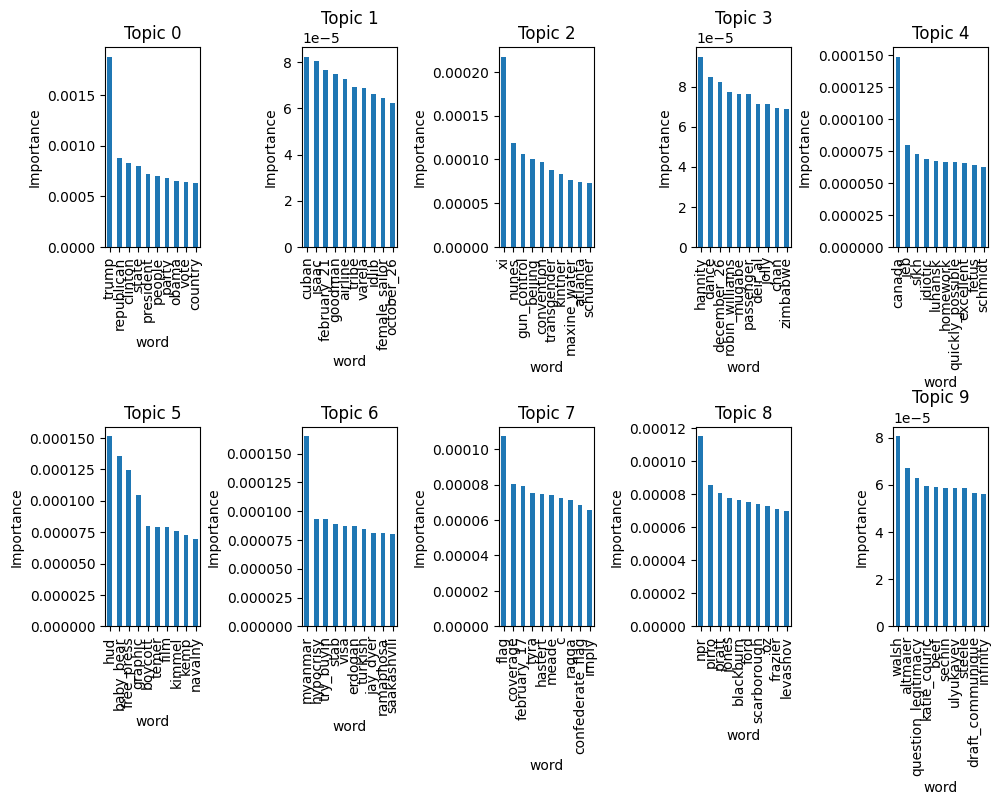

In [43]:
topics = best_model.show_topics(num_topics=-1, num_words=10, formatted=False)
num_topics = len(topics)
cols = 5  # number of colums per grid
rows = (num_topics + cols - 1) // cols  # round up

fig, axes = plt.subplots(rows, cols, figsize=(10, 4 * rows))
axes = axes.flatten()

for i, (topic_idx, topic) in enumerate(topics):
    df = pd.DataFrame(topic, columns=["word", "weight"])
    df.plot.bar(x='word', y='weight', ax=axes[i], legend=False)
    axes[i].set_title(f"Topic {topic_idx}")
    axes[i].set_ylabel("Importance")

# Hide empty subplots if there is an odd number of topics
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [44]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(best_model, text_corpus_tfidf, text_dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.086496  0.000005       1        1  79.500544
2      0.008805 -0.001899       2        1   2.685259
6      0.009013  0.001660       3        1   2.666627
3      0.009978  0.000128       4        1   2.398434
1      0.009812  0.000122       5        1   2.391112
5      0.009034  0.000067       6        1   2.211462
7      0.010164 -0.000067       7        1   2.198347
4      0.009460  0.000065       8        1   2.026176
8      0.010223 -0.000030       9        1   1.989465
9      0.010007 -0.000051      10        1   1.932574, topic_info=               Term       Freq      Total Category  logprob  loglift
107           trump  12.000000  12.000000  Default  30.0000  30.0000
6463         turkey   1.000000   1.000000  Default  29.0000  29.0000
5356     convention   0.000000   0.000000  Default  28.0000  28.0000
9932       medicaid   0.000000   0.000000  Default  27.0000  27.0000
5534        schumer   0.000000   0.000000  Default  26.0000  26.0000
...             ...        ...        ...      ...      ...      ...
2280   nuclear_test   0.007268   0.082436  Topic10 -10.0266   1.5178
6497        earnest   0.007394   0.088436  Topic10 -10.0094   1.4647
710         duterte   0.007384   0.094074  Topic10 -10.0107   1.4016
2381           aden   0.007764   0.290452  Topic10  -9.9606   0.3244
11849         korea   0.006958   0.104135  Topic10 -10.0702   1.2405

[374 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
7          1  1.078690      american
2720       1  1.335471        brexit
515        1  0.942647      campaign
772        1  1.071684       clinton
5356       1  1.672205    convention
2288       1  1.496698       correct
649        1  0.933009       country
27         1  1.046405      democrat
30         1  1.079818  donald_trump
276        1  0.956054      election
7160       1  0.932260         flynn
46         1  1.081016            go
165        1  0.951488    government
3587       1  1.629061      hispanic
781        1  1.187823     hollywood
400        1  0.876408         house
1472       1  1.490857   independent
181        1  1.123650          iran
57         1  1.069261          know
2362       1  1.279609        mccain
9932       1  1.522908      medicaid
674        1  1.128340        muslim
65         1  0.900470         obama
584        1  1.039105      official
200        1  1.086629         party
75         1  1.045470        people
82         1  1.016827     president
214        1  0.960502        report
93         1  1.001792    republican
2155       1  1.585612        resign
1997       1  0.950976        russia
10467      1  1.239946         soros
615        1  0.915368         state
330        1  0.857031       support
237        1  1.086315          tell
239        1  0.975524    the_united
333        1  0.872138         think
242        1  0.875146          time
107        1  1.021573         trump
6463       1  0.914497        turkey
112        1  0.920035          vote
737        1  0.970013   white_house
115        1  1.041198         woman, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 7, 4, 2, 6, 8, 5, 9, 10])

As all the topics are together in the PCA plotting we try with only 2 topics

In [45]:
model = LdaModel(corpus=text_corpus_tfidf,
                                id2word=text_dictionary,
                                num_topics=2,
                                random_state=42,
                                passes=10)
pyLDAvis.gensim_models.prepare(model, text_corpus_tfidf, text_dictionary)

PreparedData(topic_coordinates=              x    y  topics  cluster      Freq
topic                                          
0      0.008702  0.0       1        1  94.13015
1     -0.008702  0.0       2        1   5.86985, topic_info=                    Term      Freq     Total Category  logprob  loglift
5462                 npr  0.000000  0.000000  Default  30.0000  30.0000
24112          try_buyin  0.000000  0.000000  Default  29.0000  29.0000
1181   alternate_current  0.000000  0.000000  Default  28.0000  28.0000
6201         boiler_room  0.000000  0.000000  Default  27.0000  27.0000
4615                nice  0.000000  0.000000  Default  26.0000  26.0000
...                  ...       ...       ...      ...      ...      ...
6225       radio_network  0.008444  0.094329   Topic2 -10.9876   0.4220
1181   alternate_current  0.010221  0.119561   Topic2 -10.7966   0.3760
4615                nice  0.008816  0.198420   Topic2 -10.9445  -0.2784
1784                tune  0.007853  0.115870   Topic2 -11.0601   0.1438
7640                gang  0.007647  0.173876   Topic2 -11.0867  -0.2886

[98 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
7         1  0.818671      american
515       1  0.721987      campaign
772       1  1.109104       clinton
649       1  0.713254       country
27        1  0.797135      democrat
30        1  0.820231  donald_trump
276       1  0.730860      election
46        1  0.823821            go
165       1  0.724515    government
181       1  0.856980          iran
57        1  0.811734          know
674       1  0.855840        muslim
65        1  0.687432         obama
584       1  0.794015      official
200       1  0.665983         party
75        1  1.282482        people
922       1  0.886722        police
82        1  1.249408     president
214       1  0.732592        report
93        1  1.035622    republican
1997      1  0.724183        russia
1697      1  0.890359       russian
96        1  0.895442        senate
615       1  1.131020         state
330       1  0.868498       support
237       1  0.822442          tell
239       1  0.745441    the_united
333       1  0.884458         think
242       1  0.886859          time
107       1  0.985096         trump
112       1  0.701010          vote
737       1  0.740897   white_house
115       1  0.792929         woman, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

####**LDA for Titles**

We repeat the same procedure with the titles in order to understand if it can improve the text LDA.

In [46]:
# Compute coherence for BoW
lda_models_bow, coherence_bow = compute_coherence_values(dictionary=title_dictionary,
                                                         corpus=X_bow_title,
                                                         start=start,
                                                         limit=limit,
                                                         step=step,
                                                         texts=df_total['clean_title'])

# Compute coherence for TF-IDF
lda_models_tfidf, coherence_tfidf = compute_coherence_values(dictionary=title_dictionary,
                                                             corpus=title_corpus_tfidf,
                                                             start=start,
                                                             limit=limit,
                                                             step=step,
                                                             texts=df_total['clean_title'])

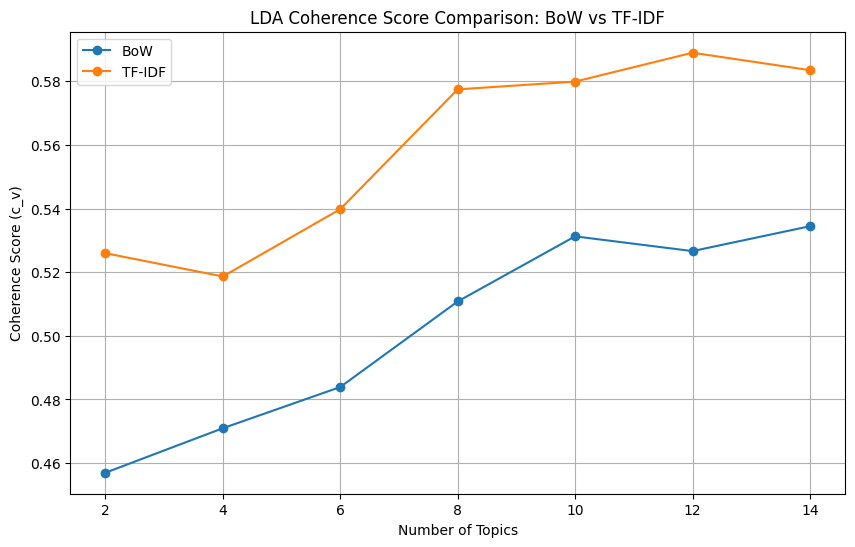

In [47]:
x = range(start, limit, step)
plt.figure(figsize=(10, 6))
plt.plot(x, coherence_bow, label="BoW", marker='o')
plt.plot(x, coherence_tfidf, label="TF-IDF", marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (c_v)")
plt.legend()
plt.title("LDA Coherence Score Comparison: BoW vs TF-IDF")
plt.grid(True)
plt.show()

In [48]:
best_idx = coherence_tfidf.index(max(coherence_tfidf))  # or coherence_tfidf
best_model = lda_models_tfidf[best_idx]  # or lda_models_tfidf[best_idx]

best_model.print_topics(num_words=10)

[(0,
  '0.001*"trump" + 0.001*"president" + 0.001*"video" + 0.001*"tweet" + 0.001*"factbox" + 0.001*"house" + 0.001*"hillary" + 0.001*"face" + 0.001*"obama" + 0.001*"republican"'),
 (1,
  '0.001*"trump" + 0.001*"obama" + 0.001*"video" + 0.001*"way" + 0.001*"vote" + 0.001*"watch" + 0.001*"clinton" + 0.001*"call" + 0.001*"support" + 0.001*"turkey"'),
 (2,
  '0.001*"trump" + 0.001*"video" + 0.001*"come" + 0.001*"leader" + 0.001*"woman" + 0.001*"tweet" + 0.001*"hillary" + 0.001*"post" + 0.001*"seek" + 0.001*"meeting"'),
 (3,
  '0.002*"to" + 0.002*"trump" + 0.002*"video" + 0.001*"destroy" + 0.001*"republican" + 0.001*"immigrant" + 0.001*"good" + 0.001*"president" + 0.001*"bill" + 0.001*"senator"'),
 (4,
  '0.001*"state" + 0.001*"trump" + 0.001*"video" + 0.001*"open" + 0.001*"meet" + 0.001*"work" + 0.001*"republican" + 0.001*"year" + 0.001*"iran" + 0.001*"breaking"'),
 (5,
  '0.002*"trump" + 0.001*"house" + 0.001*"hollywood" + 0.001*"think" + 0.001*"release" + 0.001*"see" + 0.001*"donald" + 

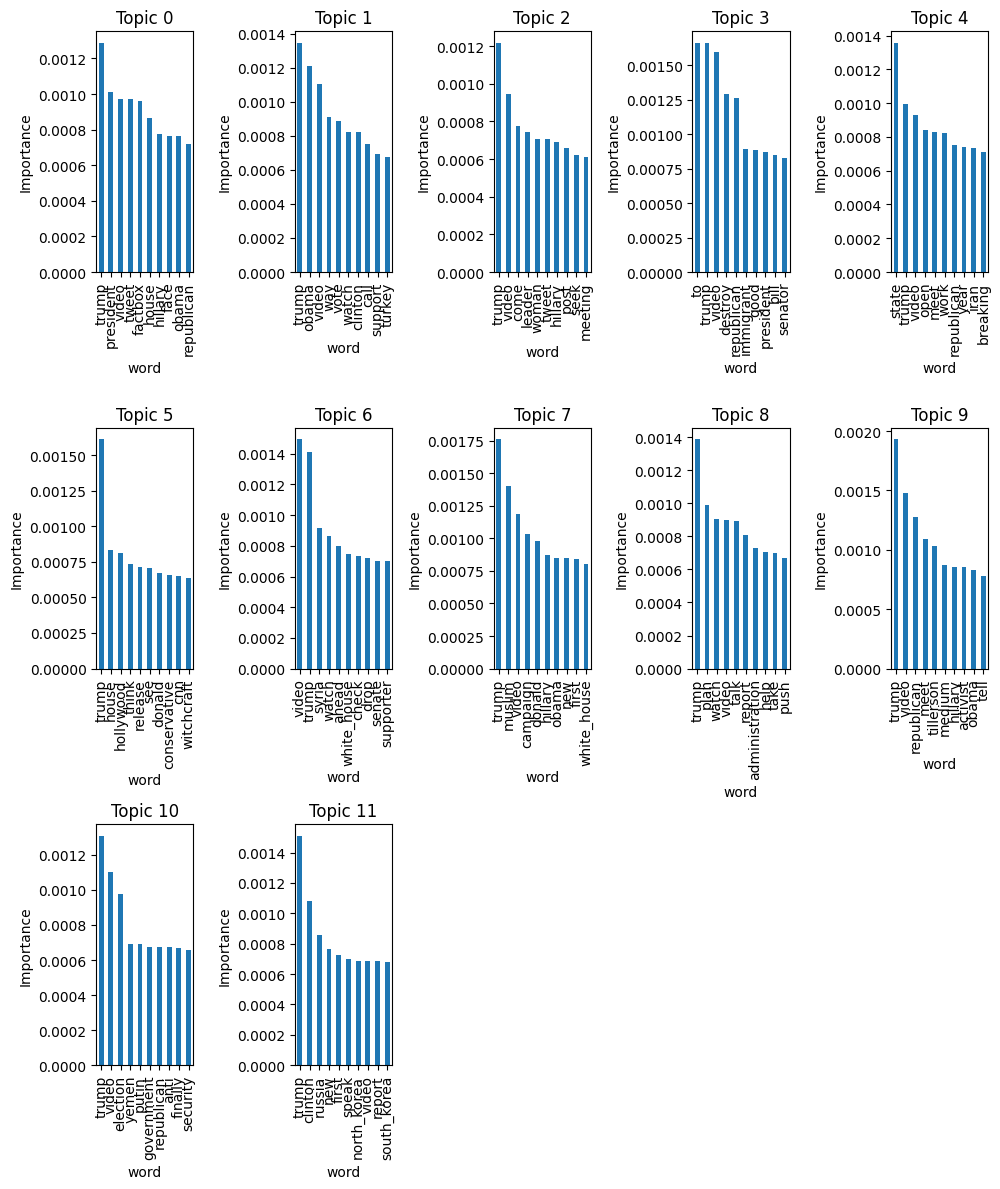

In [49]:
topics = best_model.show_topics(num_topics=-1, num_words=10, formatted=False)
num_topics = len(topics)
cols = 5  # number of columns per grid
rows = (num_topics + cols - 1) // cols  # round up

fig, axes = plt.subplots(rows, cols, figsize=(10, 4 * rows))
axes = axes.flatten()

for i, (topic_idx, topic) in enumerate(topics):
    df = pd.DataFrame(topic, columns=["word", "weight"])
    df.plot.bar(x='word', y='weight', ax=axes[i], legend=False)
    axes[i].set_title(f"Topic {topic_idx}")
    axes[i].set_ylabel("Importance")

# Hide emtpy subplots is there is an odd number of topics
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [50]:
model = LdaModel(corpus=title_corpus_tfidf,
                                id2word=title_dictionary,
                                num_topics=12,
                                random_state=42,
                                passes=10)
pyLDAvis.gensim_models.prepare(model, title_corpus_tfidf, title_dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.030671 -0.003907       1        1  10.135493
11    -0.011491 -0.016751       2        1   8.769712
8     -0.003581  0.022798       3        1   8.628102
3     -0.004612 -0.006369       4        1   8.595929
7     -0.003880  0.004693       5        1   8.508983
0     -0.001327 -0.005093       6        1   8.444249
6     -0.001152 -0.000142       7        1   8.346901
4      0.003431  0.004051       8        1   7.994489
2     -0.001330 -0.001135       9        1   7.982972
10    -0.001033 -0.007531      10        1   7.948484
5     -0.004064  0.006978      11        1   7.631863
1     -0.001632  0.002408      12        1   7.012823, topic_info=        Term      Freq     Total Category  logprob  loglift
343   muslim  0.000000  0.000000  Default  30.0000  30.0000
5         to  0.000000  0.000000  Default  29.0000  29.0000
51      meet  0.000000  0.000000  Default  28.0000  28.0000
14   destroy  0.000000  0.000000  Default  27.0000  27.0000
370    state  1.000000  1.000000  Default  26.0000  26.0000
..       ...       ...       ...      ...      ...      ...
78       big  0.087348  0.465851  Topic12  -7.6410   0.9835
685  billion  0.083207  0.383783  Topic12  -7.6896   1.1287
112   mexico  0.085803  0.534415  Topic12  -7.6589   0.8283
343   muslim  0.090012  0.920802  Topic12  -7.6110   0.3321
146     plan  0.089262  0.870110  Topic12  -7.6193   0.3804

[724 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
20        1  0.263207  trump, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 12, 9, 4, 8, 1, 7, 5, 3, 11, 6, 2])

In [51]:
# Assuming num_terms is the total number of terms in your dictionary
num_terms = len(text_dictionary)

# Convert X_bow to a dense NumPy array
X_bow_dense = corpus2dense(X_bow, num_terms=num_terms).T

# Convert X_bow_title to a dense NumPy array
num_terms_title = len(title_dictionary)
X_bow_title_dense = corpus2dense(X_bow_title, num_terms=num_terms_title).T

# Now you can use cosine_similarity:
similarity_bow = cosine_similarity(X_bow_dense)
similarity_bow_title = cosine_similarity(X_bow_title_dense)

num_terms_text = len(text_dictionary)
X_tfidf_dense = corpus2dense(text_corpus_tfidf, num_terms=num_terms_text).T
similarity_tfidf = cosine_similarity(X_tfidf_dense)

# For the titles
num_terms_title = len(title_dictionary)
X_tfidf_title_dense = corpus2dense(title_corpus_tfidf, num_terms=num_terms_title).T
similarity_tfidf_title = cosine_similarity(X_tfidf_title_dense)

### **NMF (Non-negative Matrix Factorization)**

NMF is a linear-algebra-based technique for topic modeling that decomposes the TF-IDF matrix into document-topic and topic-word matrices. Unlike LDA, NMF does not assume a generative model but can yield more coherent topics in some cases. We applied NMF using sklearn to extract interpretable topics from the TF-IDF matrix.

In [52]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf_sklearn = tfidf_vectorizer.fit_transform(df_total['clean_text'].apply(lambda x: ' '.join(x)))

nmf_model = NMF(n_components=10, random_state=42)
nmf_topics = nmf_model.fit_transform(X_tfidf_sklearn)

# Top words per topic
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf_model.components_):
    print(f"Topic #{topic_idx + 1}: {[feature_names[i] for i in topic.argsort()[:-11:-1]]}")


Topic #1: ['state', 'company', 'government', 'federal', 'law', 'program', 'administration', 'plan', 'year', 'country']
Topic #2: ['trump', 'donald_trump', 'president', 'republican', 'white_house', 'campaign', 'supporter', 'election', 'support', 'win']
Topic #3: ['russia', 'russian', 'putin', 'moscow', 'official', 'investigation', 'election', 'kremlin', 'syria', 'campaign']
Topic #4: ['republican', 'senate', 'vote', 'democrat', 'bill', 'house', 'washington_reuters', 'pas', 'democratic', 'committee']
Topic #5: ['clinton', 'email', 'hillary_clinton', 'campaign', 'fbi', 'hillary', 'department', 'sander', 'democratic', 'server']
Topic #6: ['china', 'north_korea', 'chinese', 'xi', 'the_united', 'state', 'pyongyang', 'beijing', 'tillerson', 'trade']
Topic #7: ['party', 'eu', 'macron', 'merkel', 'election', 'parliament', 'leader', 'germany', 'government', 'euro_zone']
Topic #8: ['iran', 'iranian', 'deal', 'saudi_arabia', 'state', 'the_united', 'syria', 'tehran', 'nuclear_deal', 'sanction']
Top

### **SENTENCE TRANSFORMERS (based on BERT or ismilar)**

BERTopic:

BERTopic combines transformer embeddings (like BERT) with clustering algorithms and topic reduction to create interpretable topics. It captures rich semantic and contextual relationships between words, outperforming traditional methods in many real-world settings. We applied BERTopic to analyze and visualize meaningful topics in the news corpus.

In [53]:
!pip install -U sentence-transformers

from sentence_transformers import SentenceTransformer

# Load a pretrained model (distilbert is fast and high quality)
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 3.4.1
    Uninstalling sentence-transformers-3.4.1:
      Successfully uninstalled sentence-transformers-3.4.1


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [54]:
# Join tokens into string for SBERT
text_docs = df_total['clean_text'].apply(lambda tokens: ' '.join(tokens)).tolist()
title_docs = df_total['clean_title'].apply(lambda tokens: ' '.join(tokens)).tolist()


In [55]:
from sklearn.preprocessing import normalize
import numpy as np

# Generate embeddings
text_embeddings_sbert = sbert_model.encode(text_docs, show_progress_bar=True, convert_to_numpy=True)
title_embeddings_sbert = sbert_model.encode(title_docs, show_progress_bar=True, convert_to_numpy=True)

# Normalize (recommended before similarity or clustering)
text_embeddings_sbert = normalize(text_embeddings_sbert)
title_embeddings_sbert = normalize(title_embeddings_sbert)


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

### **t-SNE Visualization of Embeddings**

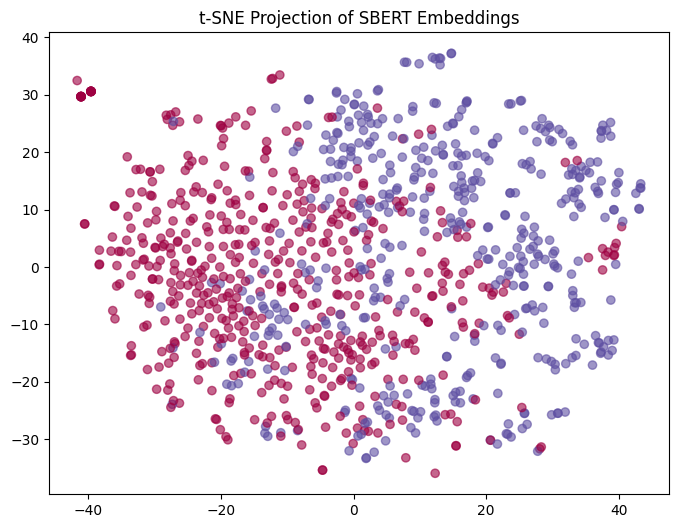

In [56]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne_sbert = TSNE(n_components=2, random_state=42)
sbert_proj = tsne_sbert.fit_transform(text_embeddings_sbert)

plt.figure(figsize=(8, 6))
plt.scatter(sbert_proj[:, 0], sbert_proj[:, 1], c=df_total['target'].factorize()[0], cmap='Spectral', alpha=0.6)
plt.title("t-SNE Projection of SBERT Embeddings")
plt.show()


Observations:
- Some visible separation between the two classes (mostly horizontal).
- Fake and real news form two overlapping clouds, but there’s a central region with more mixing.
- The embedding space is relatively well-structured, suggesting that SBERT captures useful semantic features.

Conclusion:

SBERT provides moderate class separability—it’s not perfect, but the clustering indicates that a classifier should be able to find a good decision boundary, especially if combined with metadata or higher-dimensional structures.

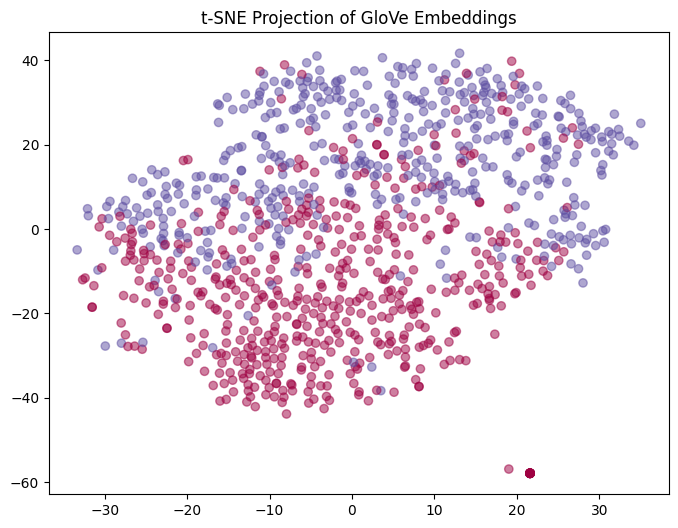

In [57]:
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Visualizing GloVe for texts
tsne = TSNE(n_components=2, random_state=42)
tsne_proj = tsne.fit_transform(X_glove)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_proj[:, 0], tsne_proj[:, 1], c=df_total['target'].factorize()[0], cmap='Spectral', alpha=0.5)
plt.title("t-SNE Projection of GloVe Embeddings")
plt.show()


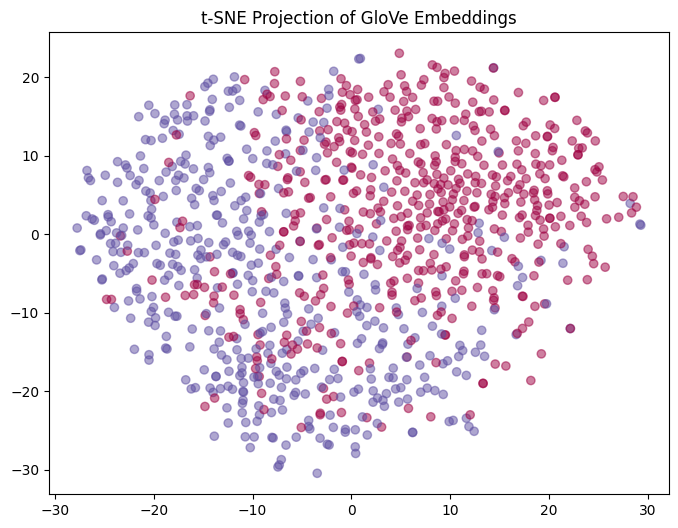

In [58]:
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt


tsne = TSNE(n_components=2, random_state=42)
tsne_proj = tsne.fit_transform(X_glove_titles)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_proj[:, 0], tsne_proj[:, 1], c=df_total['target'].factorize()[0], cmap='Spectral', alpha=0.5)
plt.title("t-SNE Projection of GloVe Embeddings")
plt.show()


Observations:
- There's clearer separation between the two classes, with blue and red regions mostly occupying opposite halves.
- Less overlap than SBERT, especially vertically.
- Clusters are more compact and linearly separable.



- t-SNE focuses on local structure, so clusters and distance relationships are only meaningful at the neighborhood level (not globally).
- Overlaps don’t necessarily mean poor performance—some ambiguity is expected in real data.
- t-SNE is non-deterministic by default, so results may vary unless a random_state is set (which we did).

In [114]:
from sklearn.metrics import silhouette_score

# Silhouette score para clustering (por ejemplo con NMF)
score_nmf = silhouette_score(nmf_topics, nmf_topics.argmax(axis=1))
print("Silhouette score (NMF):", score_nmf)

# Coherence ya lo estás usando con LDA 👍


Silhouette score (NMF): 0.23920034327860815


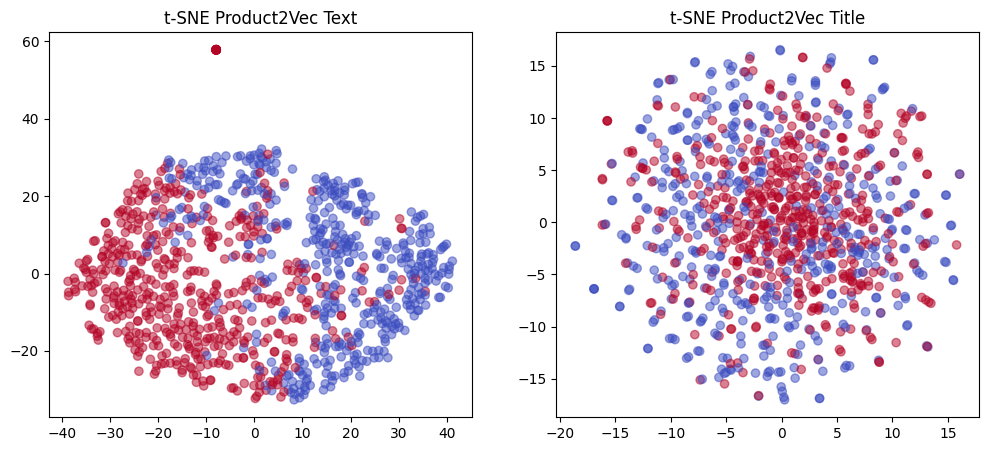

In [60]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
proj_text  = tsne.fit_transform(X_prod2vec_text)
proj_title = tsne.fit_transform(X_prod2vec_title)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(proj_text[:,0], proj_text[:,1],
            c=df_total['target'], cmap='coolwarm', alpha=0.5)
plt.title("t-SNE Product2Vec Text")

plt.subplot(1,2,2)
plt.scatter(proj_title[:,0], proj_title[:,1],
            c=df_total['target'], cmap='coolwarm', alpha=0.5)
plt.title("t-SNE Product2Vec Title")
plt.show()


Observations:


*   For texts, there is a left - right division, which seems a little more scattered than with GloVe
*   For titles, this approach appears almost undifferentiated, while with GloVe there was some drift between classes
*   There is more overlap than with the other 2 methods







General Conclusion:


Surprisingly, the GloVe average vectors show stronger class separation than SBERT in this projection. This might be due to the reduced dimensionality or averaging effect smoothing noise across documents. In contrast, Product2Vec delivers a moderate separation on full text embeddings, weaker than both GloVe and SBERT, and fails to differentiate classes when applied to titles alone.

It suggests that GloVe is performing well for this dataset, potentially due to the nature of the vocabulary and sentence length.

## **Comparison of Vectorization techniques**

All the tested Vectorization techniques are checked and compared throught the similarity matrix. We can say teh for titles Doc2Vect is the first one and GloVe is the best one for texts.

To explore relationships between documents, we compute cosine similarity matrices using BoW and TF-IDF (both dense), which reflect how semantically similar news articles are. These can later be used for clustering, duplicate detection, or recommendation systems.

In [61]:
def average_similarity(matrix):
    n = matrix.shape[0]
    return (matrix.sum() - n) / (n * (n - 1))

In [62]:
similarity_doc2vec_text = cosine_similarity(text_doc_vectors)
similarity_doc2vec_titles = cosine_similarity(title_doc_vectors)
similarity_glove_titles = cosine_similarity(X_glove_titles)
similarity_glove_texts = cosine_similarity(X_glove)
similarity_p2v_text  = cosine_similarity(X_prod2vec_text)
similarity_p2v_title = cosine_similarity(X_prod2vec_title)


print("Cosine Similarity Matrix (BoW - Text):")
print(average_similarity(similarity_bow))

print("\nCosine Similarity Matrix (BoW - Title):")
print(average_similarity(similarity_bow_title))

print("\nCosine Similarity Matrix (TF-IDF - Text):")
print(average_similarity(similarity_tfidf))

print("\nCosine Similarity Matrix (TF-IDF - Title):")
print(average_similarity(similarity_tfidf_title))

print("\nCosine Similarity Matrix (Doc2Vec - Text):")
print(average_similarity(similarity_doc2vec_text))
print("\nCosine Similarity Matrix (Doc2Vec - Title):")
print(average_similarity(similarity_doc2vec_titles))

print("\nCosine Similarity Matrix (GloVe - Text):")
print(average_similarity(similarity_glove_texts))

print("\nCosine Similarity Matrix (GloVe - Title):")
print(average_similarity(similarity_glove_titles))

print("\nCosine Similarity Matrix (Prod2Vec - Text):")
print(average_similarity(similarity_p2v_text))

print("\nCosine Similarity Matrix (Prod2Vec - Title):")
print(average_similarity(similarity_p2v_title))



Cosine Similarity Matrix (BoW - Text):
0.06776291916916917

Cosine Similarity Matrix (BoW - Title):
0.02653122458395896

Cosine Similarity Matrix (TF-IDF - Text):
0.016662259916166166

Cosine Similarity Matrix (TF-IDF - Title):
0.00486866065284034

Cosine Similarity Matrix (Doc2Vec - Text):
0.29286655405405404

Cosine Similarity Matrix (Doc2Vec - Title):
0.9523263263263263

Cosine Similarity Matrix (GloVe - Text):
0.8650297316912899

Cosine Similarity Matrix (GloVe - Title):
0.6592386136136136

Cosine Similarity Matrix (Prod2Vec - Text):
0.7419415572933371

Cosine Similarity Matrix (Prod2Vec - Title):
0.9939855575167916


In [63]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def average_similarity(matrix):
    n = matrix.shape[0]
    return (matrix.sum() - n) / (n * (n - 1))

def group_similarities(vectors, labels):
    vectors = np.array(vectors)
    labels = np.array(labels)

    group0 = vectors[labels == 0]
    group1 = vectors[labels == 1]

    # Intra  group similarity
    sim0 = cosine_similarity(group0)
    sim1 = cosine_similarity(group1)

    intra_0 = average_similarity(sim0)
    intra_1 = average_similarity(sim1)

    # Inter group similarity
    sim_inter = cosine_similarity(group0, group1)
    inter = sim_inter.mean()

    return intra_0, intra_1, inter


In [64]:
labels = df_total['target'].values

# Doc2Vec - Text
intra_0_d2v_text, intra_1_d2v_text, inter_d2v_text = group_similarities(text_doc_vectors, labels)

# Doc2Vec - Title
intra_0_d2v_title, intra_1_d2v_title, inter_d2v_title = group_similarities(title_doc_vectors, labels)

# GloVe - Text
intra_0_glove_text, intra_1_glove_text, inter_glove_text = group_similarities(X_glove, labels)

# GloVe - Title
intra_0_glove_title, intra_1_glove_title, inter_glove_title = group_similarities(X_glove_titles, labels)

# Product2Vec - Text
intra_0_p2v_text,  intra_1_p2v_text,  inter_p2v_text  = group_similarities(X_prod2vec_text,  labels)

# Product2Vec - Title
intra_0_p2v_title, intra_1_p2v_title, inter_p2v_title = group_similarities(X_prod2vec_title, labels)


In [65]:
def print_group_sim(name, intra_0, intra_1, inter):
    print(f"\n{name}")
    print(f"Intra-grupo (FAKE = 0): {intra_0:.4f}")
    print(f"Intra-grupo (REAL = 1): {intra_1:.4f}")
    print(f"Entre grupos (0 vs 1): {inter:.4f}")

print_group_sim("Doc2Vec - Text", intra_0_d2v_text, intra_1_d2v_text, inter_d2v_text)
print_group_sim("Doc2Vec - Title", intra_0_d2v_title, intra_1_d2v_title, inter_d2v_title)
print_group_sim("GloVe - Text", intra_0_glove_text, intra_1_glove_text, inter_glove_text)
print_group_sim("GloVe - Title", intra_0_glove_title, intra_1_glove_title, inter_glove_title)
print_group_sim("Prod2Vec - Text",  intra_0_p2v_text,  intra_1_p2v_text,  inter_p2v_text)
print_group_sim("Prod2Vec - Title", intra_0_p2v_title, intra_1_p2v_title, inter_p2v_title)


Doc2Vec - Text
Intra-grupo (FAKE = 0): 0.3703
Intra-grupo (REAL = 1): 0.3525
Entre grupos (0 vs 1): 0.2251

Doc2Vec - Title
Intra-grupo (FAKE = 0): 0.9679
Intra-grupo (REAL = 1): 0.9388
Entre grupos (0 vs 1): 0.9533

GloVe - Text
Intra-grupo (FAKE = 0): 0.9047
Intra-grupo (REAL = 1): 0.8500
Entre grupos (0 vs 1): 0.8562

GloVe - Title
Intra-grupo (FAKE = 0): 0.6305
Intra-grupo (REAL = 1): 0.7189
Entre grupos (0 vs 1): 0.6378

Prod2Vec - Text
Intra-grupo (FAKE = 0): 0.7943
Intra-grupo (REAL = 1): 0.7704
Entre grupos (0 vs 1): 0.7029

Prod2Vec - Title
Intra-grupo (FAKE = 0): 0.9889
Intra-grupo (REAL = 1): 0.9984
Entre grupos (0 vs 1): 0.9937


In [66]:
similarity_sbert_texts = cosine_similarity(text_embeddings_sbert)
similarity_sbert_titles = cosine_similarity(title_embeddings_sbert)

print("\nCosine Similarity Matrix (SBERT - Text):")
print(average_similarity(similarity_sbert_texts))
print("\nCosine Similarity Matrix (SBERT - Title):")
print(average_similarity(similarity_sbert_titles))

# Group-wise similarity
intra_0_sbert_text, intra_1_sbert_text, inter_sbert_text = group_similarities(text_embeddings_sbert, labels)
intra_0_sbert_title, intra_1_sbert_title, inter_sbert_title = group_similarities(title_embeddings_sbert, labels)

print_group_sim("SBERT - Text", intra_0_sbert_text, intra_1_sbert_text, inter_sbert_text)
print_group_sim("SBERT - Title", intra_0_sbert_title, intra_1_sbert_title, inter_sbert_title)



Cosine Similarity Matrix (SBERT - Text):
0.36197100225225226

Cosine Similarity Matrix (SBERT - Title):
0.15425239301801802

SBERT - Text
Intra-grupo (FAKE = 0): 0.3636
Intra-grupo (REAL = 1): 0.3983
Entre grupos (0 vs 1): 0.3406

SBERT - Title
Intra-grupo (FAKE = 0): 0.1270
Intra-grupo (REAL = 1): 0.2149
Entre grupos (0 vs 1): 0.1316


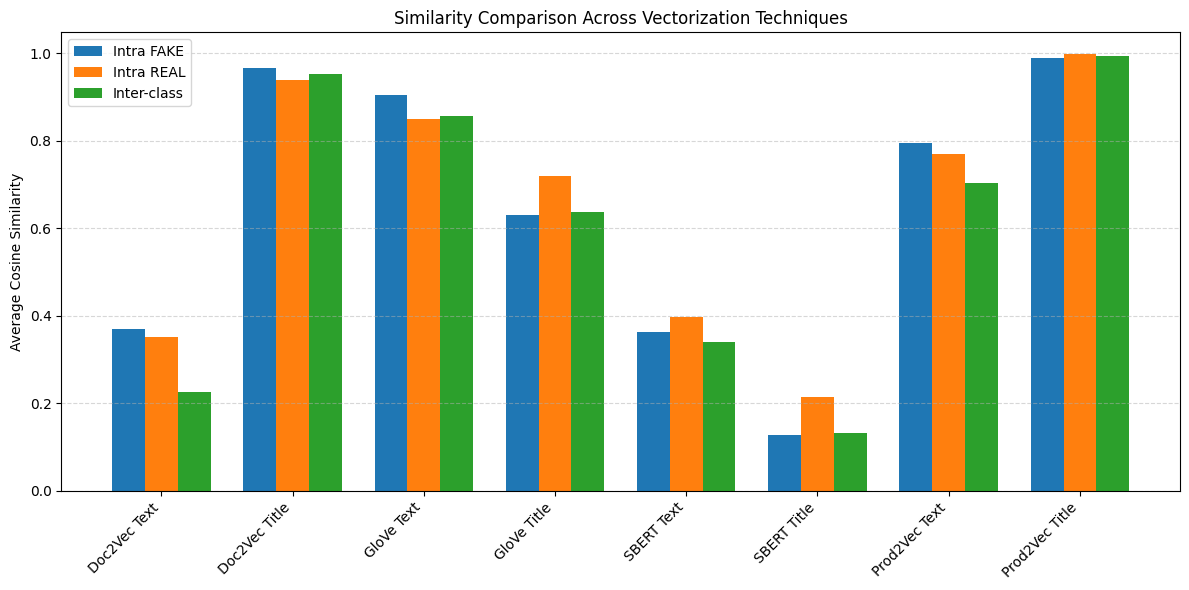

In [67]:
techniques = ['Doc2Vec Text', 'Doc2Vec Title', 'GloVe Text', 'GloVe Title', 'SBERT Text', 'SBERT Title','Prod2Vec Text','Prod2Vec Title']
intra_fake = [intra_0_d2v_text, intra_0_d2v_title, intra_0_glove_text, intra_0_glove_title, intra_0_sbert_text, intra_0_sbert_title, intra_0_p2v_text,  intra_0_p2v_title]
intra_real = [intra_1_d2v_text, intra_1_d2v_title, intra_1_glove_text, intra_1_glove_title, intra_1_sbert_text, intra_1_sbert_title, intra_1_p2v_text,  intra_1_p2v_title]
inter_class = [inter_d2v_text, inter_d2v_title, inter_glove_text, inter_glove_title, inter_sbert_text, inter_sbert_title, inter_p2v_text,  inter_p2v_title]


x = np.arange(len(techniques))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, intra_fake, width, label='Intra FAKE')
plt.bar(x, intra_real, width, label='Intra REAL')
plt.bar(x + width, inter_class, width, label='Inter-class')

plt.xticks(x, techniques, rotation=45, ha='right')
plt.ylabel("Average Cosine Similarity")
plt.title("Similarity Comparison Across Vectorization Techniques")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


To evaluate the effectiveness of each vectorization method, we compute pairwise **cosine similarity matrices** for all documents and analyze:
- **Average document similarity** across the entire dataset.
- **Intra-class similarity** (Fake-Fake and Real-Real).
- **Inter-class similarity** (Fake vs Real).

A good representation should have **high intra-class similarity** and **low inter-class similarity**. Below, we compare Doc2Vec, GloVe, Prod2Vec and SBERT embeddings and visualize their ability to separate fake and real news.


In [68]:
from sklearn.metrics import silhouette_score

print("Silhouette Score (SBERT):", silhouette_score(text_embeddings_sbert, labels))
print("Silhouette Score (GloVe):", silhouette_score(X_glove, labels))
print("Silhouette Score (Doc2Vec):", silhouette_score(text_doc_vectors, labels))
print("Silhouette Score (Prod2Vec):",  silhouette_score(X_prod2vec_text,  labels))


Silhouette Score (SBERT): 0.032942895
Silhouette Score (GloVe): 0.09124647445492716
Silhouette Score (Doc2Vec): 0.07558824
Silhouette Score (Prod2Vec): 0.15621643953870828


In [69]:
df_total = df_total_aux
df_total.shape

(44898, 14)

In [70]:
# Convert the list of tokens in each row to a single string before joining
X_bow = [text_dictionary.doc2bow(text) for text in df_total['clean_text']]
X_bow_title =  [title_dictionary.doc2bow(text) for text in df_total['clean_title']]

In [71]:
tfidf_model = TfidfModel(X_bow)
text_corpus_tfidf = tfidf_model[X_bow]

tfidf_model_title = TfidfModel(X_bow_title)
title_corpus_tfidf = tfidf_model_title[X_bow_title]


In [72]:
model_lda = LdaModel(corpus=title_corpus_tfidf,
                                id2word=title_dictionary,
                                num_topics=12,
                                random_state=42,
                                passes=10)
pyLDAvis.gensim_models.prepare(model_lda, title_corpus_tfidf, title_dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.168367  0.133405       1        1  13.218032
11    -0.150873  0.086760       2        1   9.738943
9      0.100409  0.063636       3        1   9.035039
8     -0.122774  0.136307       4        1   8.526946
10    -0.031638  0.111642       5        1   8.288972
4     -0.046261 -0.155760       6        1   7.794741
1      0.166732  0.008495       7        1   7.519576
0      0.119485 -0.068752       8        1   7.499210
3     -0.072151 -0.072050       9        1   7.339364
5     -0.146540 -0.020366      10        1   7.316643
7     -0.055072 -0.092662      11        1   6.990225
2      0.070316 -0.130654      12        1   6.732309, topic_info=                Term        Freq        Total Category  logprob  loglift
878    supreme_court  146.000000   146.000000  Default  30.0000  30.0000
238              tax  112.000000   112.000000  Default  29.0000  29.0000
1217  administration  139.000000   139.000000  Default  28.0000  28.0000
510          factbox  178.000000   178.000000  Default  27.0000  27.0000
480           senate  242.000000   242.000000  Default  26.0000  26.0000
...              ...         ...          ...      ...      ...      ...
2451      prosecutor   33.034890    50.532869  Topic12  -5.4420   2.2732
20             trump   53.006348  1159.634801  Topic12  -4.9691  -0.3872
598            mayor   33.178989    59.217748  Topic12  -5.4376   2.1189
2112       obamacare   33.960673    81.843642  Topic12  -5.4143   1.8186
86            attack   34.053946   217.228389  Topic12  -5.4116   0.8452

[640 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
633      12  0.963379           1
1463     12  0.957252          15
3419      5  0.980597       about
1384      7  0.982040  absolutely
1237      2  0.807049      accuse
...     ...       ...         ...
473       8  0.011920         wow
473      12  0.035759         wow
414       1  0.961841       wrong
460       7  0.976201       young
927       6  0.964299    zimbabwe

[1344 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 12, 10, 9, 11, 5, 2, 1, 4, 6, 8, 3])

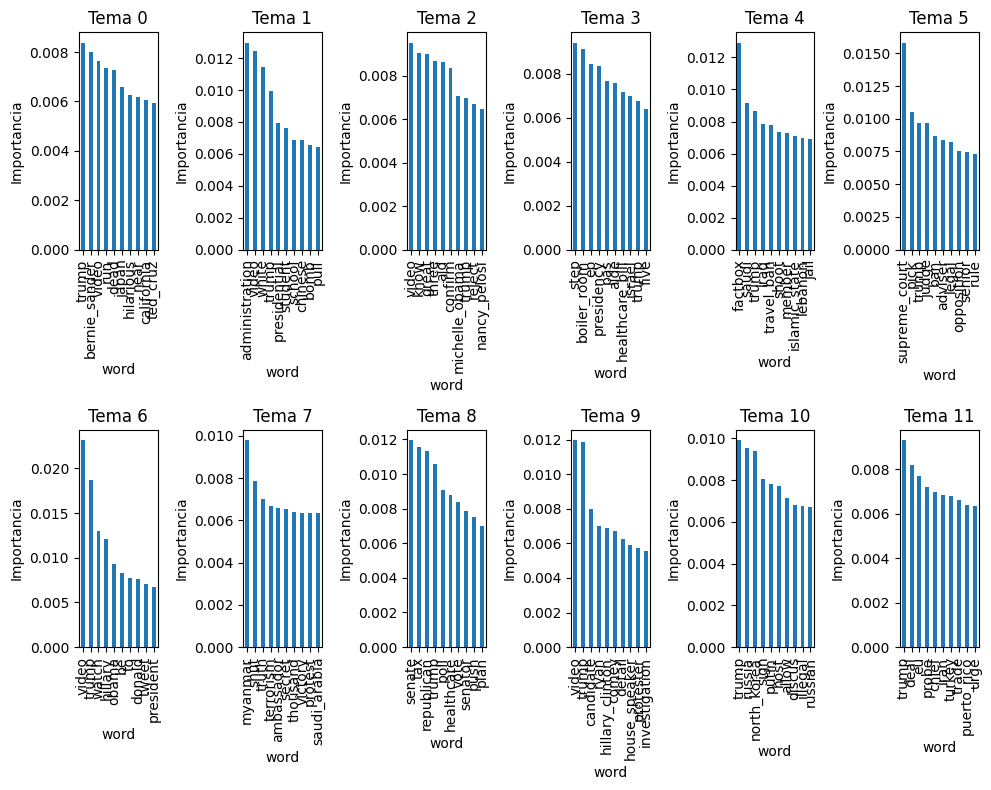

In [73]:
topics = model_lda.show_topics(num_topics=-1, num_words=10, formatted=False)
num_topics = len(topics)
cols = 6  # num cols in the grid
rows = (num_topics + cols - 1) // cols  # round up

fig, axes = plt.subplots(rows, cols, figsize=(10, 4 * rows))
axes = axes.flatten()

for i, (topic_idx, topic) in enumerate(topics):
    df = pd.DataFrame(topic, columns=["word", "weight"])
    df.plot.bar(x='word', y='weight', ax=axes[i], legend=False)
    axes[i].set_title(f"Tema {topic_idx}")
    axes[i].set_ylabel("Importancia")


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [74]:
def get_doc_vector(tokens):
    vectors = [glove_model[word] for word in tokens if word in glove_model]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(glove_model.vector_size)

# Obtain Glove Vectors for text
X_glove = np.vstack(df_total['clean_text'].progress_apply(get_doc_vector))
X_glove = normalize(X_glove)

print("GloVe Vectors for Texts:")
print(X_glove)

# Obtain Glove Vectors for titles
X_glove_title = np.vstack(df_total['clean_title'].progress_apply(get_doc_vector))
X_glove_title = normalize(X_glove_title)

print("GloVe Vectors for title:")
print(X_glove_title)

  0%|          | 0/44898 [00:00<?, ?it/s]

GloVe Vectors for Texts:
[[ 0.00172401 -0.01102689  0.0440253  ... -0.01208985  0.0037609
   0.09190548]
 [ 0.10307536 -0.01555879  0.06075974 ...  0.12101764  0.00693875
  -0.02727407]
 [-0.0102116   0.05089243  0.04484629 ...  0.04704005  0.02366392
   0.10814862]
 ...
 [ 0.00287755 -0.00439103  0.08067573 ...  0.07028569  0.00235485
   0.10377815]
 [ 0.00352833  0.04259882  0.00623791 ...  0.06259439  0.04193722
  -0.01241674]
 [ 0.01495173  0.00375381  0.05856923 ...  0.0342568  -0.01045836
   0.06421899]]


  0%|          | 0/44898 [00:00<?, ?it/s]

GloVe Vectors for title:
[[-0.0440387  -0.10031213  0.1350596  ... -0.04193314 -0.01893296
   0.06135872]
 [ 0.09428259 -0.21684613  0.07049971 ...  0.43056628  0.24770486
  -0.00795202]
 [ 0.04191677 -0.02812768  0.2252428  ... -0.02278147 -0.00981249
   0.03783484]
 ...
 [-0.04001532 -0.06221649  0.128441   ...  0.01998889 -0.04863664
   0.10775048]
 [ 0.02419908  0.0407486  -0.01565614 ...  0.04783145  0.02349944
  -0.06858063]
 [-0.13398972  0.00286824  0.09218139 ...  0.01810831 -0.01035457
   0.08989689]]


In [75]:
text_documents = [TaggedDocument(words=tokens, tags=[f"text_{i}"]) for i, tokens in enumerate(df_total['clean_text'])]
title_documents = [TaggedDocument(words=tokens, tags=[f"title_{i}"]) for i, tokens in enumerate(df_total['clean_title'])]


doc2vec_model_text = Doc2Vec(vector_size=100, window=5, min_count=2, workers=4, epochs=20)
doc2vec_model_text.build_vocab(text_documents)
doc2vec_model_text.train(text_documents, total_examples=doc2vec_model_text.corpus_count, epochs=doc2vec_model_text.epochs)

# Train Doc2Vec for titles
doc2vec_model_title = Doc2Vec(vector_size=50, window=3, min_count=2, workers=4, epochs=20)
doc2vec_model_title.build_vocab(title_documents)
doc2vec_model_title.train(title_documents, total_examples=doc2vec_model_title.corpus_count, epochs=doc2vec_model_title.epochs)

# Infer vectors for each document
text_doc_vectors = [doc2vec_model_text.infer_vector(tokens) for tokens in df_total['clean_text']]
title_doc_vectors = [doc2vec_model_title.infer_vector(tokens) for tokens in df_total['clean_title']]


doc2vec_text_df = pd.DataFrame(text_doc_vectors).add_prefix("text_d2v_")
doc2vec_title_df = pd.DataFrame(title_doc_vectors).add_prefix("title_d2v_")

print("Doc2Vec vectorization completa. Nuevas columnas añadidas al DataFrame.")

Doc2Vec vectorization completa. Nuevas columnas añadidas al DataFrame.


In [76]:
# Join tokens into string for SBERT
text_docs = df_total['clean_text'].apply(lambda tokens: ' '.join(tokens)).tolist()
title_docs = df_total['clean_title'].apply(lambda tokens: ' '.join(tokens)).tolist()


In [77]:
from sklearn.preprocessing import normalize
import numpy as np

# Generate embeddings
text_embeddings_sbert = sbert_model.encode(text_docs, show_progress_bar=True, convert_to_numpy=True)
title_embeddings_sbert = sbert_model.encode(title_docs, show_progress_bar=True, convert_to_numpy=True)

# Normalize (recommended before similarity or clustering)
text_embeddings_sbert = normalize(text_embeddings_sbert)
title_embeddings_sbert = normalize(title_embeddings_sbert)


Batches:   0%|          | 0/1404 [00:00<?, ?it/s]

Batches:   0%|          | 0/1404 [00:00<?, ?it/s]

### Interpretation

To assess the quality of different vector representations, we analyzed their **average cosine similarity**, as well as **intra-class** (within fake or real news) and **inter-class** (fake vs. real) similarity scores. A good vectorization method should yield **high intra-class similarity** and **low inter-class similarity**.

#### Key Observations:

- **BoW & TF-IDF**:
  - Both methods yield **very low similarity scores** across the board.
  - Their sparse and purely frequency-based nature fails to capture deeper semantic structure.

- **Doc2Vec**:
  - **Doc2Vec on titles** shows **very high similarity** across all samples — even between classes (intra ≈ inter ≈ 0.95), suggesting it **fails to differentiate fake and real news**.
  - **Doc2Vec on text** performs moderately, with better inter-class separation.

- **GloVe**:
  - **GloVe on full text** achieves the best **intra-class cohesion** and fairly high **inter-class separation**, making it the strongest embedding among the classical methods.
  - **GloVe on titles** performs reasonably but with some class overlap.

- **Prod2Vec**:
  - **Prod2Vec on full text** achieves rasonably high **intra-class cohesion** and modera **inter-class separation** (intra ≈ 0.79/0.77, inter ≈ 0.70), it outperforms all the methods excepto GloVe.
  - **Prod2Vec on titles** obtains a score pretty similar to Doc2Vec, obtain really high similarities among and between classes,  so fails to differetiate between them.

- **SBERT**:
  - **SBERT embeddings** show **the best inter-class separation** (lowest inter-group similarity), especially on titles.
  - While intra-class similarity is lower compared to GloVe, the **discriminative power** is higher, which is beneficial for classification tasks.

#### Visual Insight:

- The **t-SNE projections** support these observations. GloVe exhibits smooth, broad class separation, while SBERT shows sharper clusters with minimal mixing — especially useful for building accurate classifiers.



### **Conclusion:**

- For **semantic separability**, **SBERT** stands out—especially for short texts like titles.
- For **overall compactness and stable performance**, **GloVe on full texts** performs best.
- **Doc2Vec on titles** overfits to common patterns and does not help with class separation.
- **Prod2Vec** internal cohesion is reasonable,but clusters are not sharply separated.
- **BoW/TF-IDF** are useful for baseline models but lack discriminative strength.

We will use these embeddings in the next phase for classification, clustering, and recommendation tasks to evaluate real-world performance.




---



# **TASK 2**

## 2.1 Classification

1. BenchMarck using Metadat about the news

2. Iteration over title information models

3. Iteration with corpus information

4. Best model selection

### 1. Bench Marck using Metadata

Classification Report (Linear Regression with Macro Data):
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      4261
           1       0.88      0.81      0.84      4719

    accuracy                           0.84      8980
   macro avg       0.84      0.84      0.84      8980
weighted avg       0.85      0.84      0.84      8980

ROC AUC: 0.8968


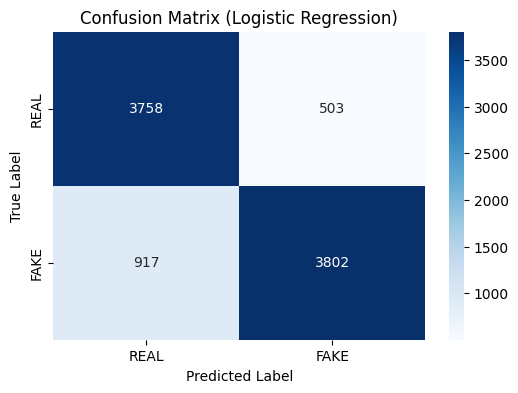

In [78]:
X = df_total[['title_length', 'word_count','text_length', 'word_count_title']]
y = df_total['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predictions & evaluation
y_pred = lr_model.predict(X_test)
print("Classification Report (Linear Regression with Macro Data):")
print(classification_report(y_test, y_pred))
y_proba = lr_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {roc_auc:.4f}")
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['REAL', 'FAKE'], yticklabels=['REAL', 'FAKE'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()


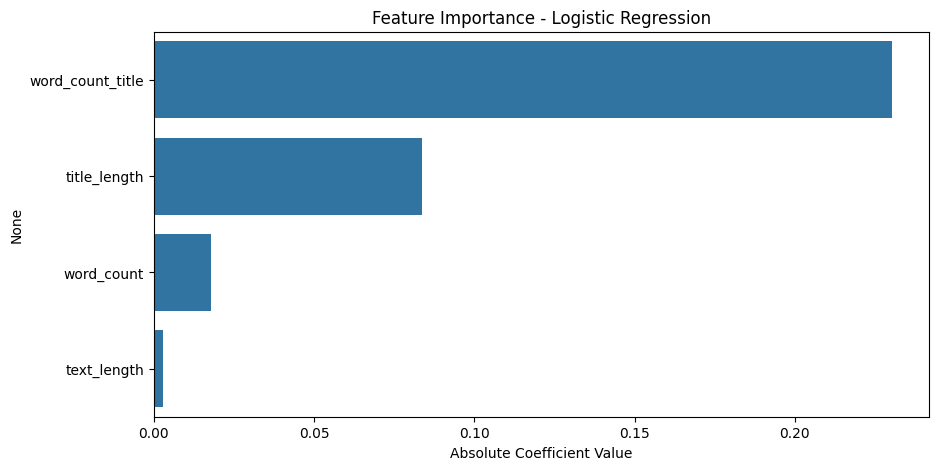

In [79]:
importances = lr_model.coef_[0]
feature_names = X.columns
sorted_idx = np.argsort(np.abs(importances))[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=np.abs(importances)[sorted_idx], y=feature_names[sorted_idx])
plt.title("Feature Importance - Logistic Regression")
plt.xlabel("Absolute Coefficient Value")
plt.show()


### 2. Model using only the title text


Logistic Regression (Using Title):
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4261
           1       0.86      0.85      0.85      4719

    accuracy                           0.85      8980
   macro avg       0.85      0.85      0.85      8980
weighted avg       0.85      0.85      0.85      8980

ROC AUC: 0.9288

Random Forest (Using Title):
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4261
           1       0.87      0.88      0.88      4719

    accuracy                           0.87      8980
   macro avg       0.87      0.87      0.87      8980
weighted avg       0.87      0.87      0.87      8980

ROC AUC: 0.9381

SVM (Using Title):
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4261
           1       0.91      0.88      0.89      4719

    accuracy                           0.89      8980
   macro a

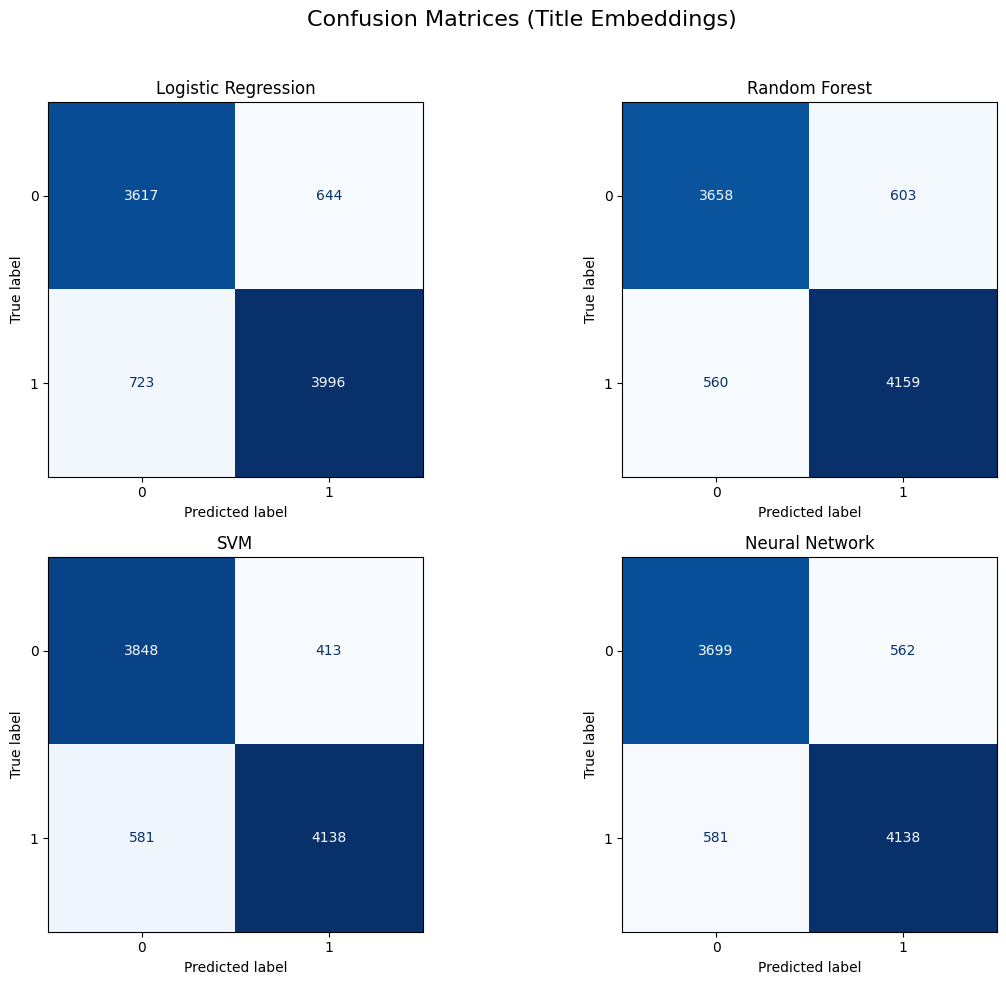

In [80]:
X_title = title_doc_vectors


X_train, X_test, y_train, y_test = train_test_split(X_title, y, test_size=0.2, random_state=42)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Neural Network": MLPClassifier(max_iter=1000)
}

# Create subplots ( 2 rows x 2 cols)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()  # Aplanar para indexar fácilmente

# Training & visualization
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n{name} (Using Title):")
    print(classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC: {roc_auc:.4f}")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(name)

plt.suptitle("Confusion Matrices (Title Embeddings)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Space for the Title
plt.show()


### 3. Model using the text data


Logistic Regression (Using Text):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4261
           1       0.94      0.94      0.94      4719

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

ROC AUC: 0.9449

Random Forest (Using Text):
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      4261
           1       0.93      0.95      0.94      4719

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980

ROC AUC: 0.9449

SVM (Using Text):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4261
           1       0.96      0.96      0.96      4719

    accuracy                           0.96      8980
   macro avg 

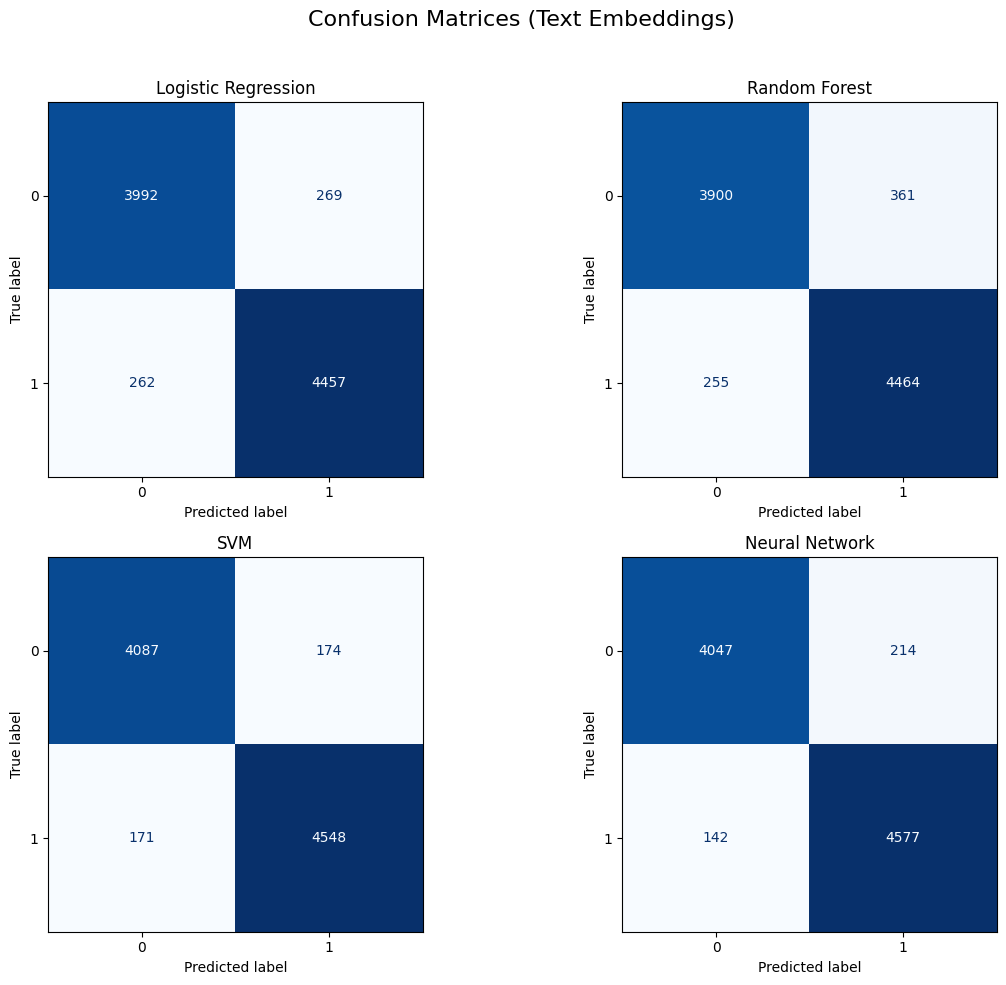

In [81]:
X_title = text_doc_vectors

X_train, X_test, y_train, y_test = train_test_split(X_title, y, test_size=0.2, random_state=42)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

# Subplots (2 rows x 2 cols)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()  # Aplanar para indexar fácilmente

# Training & Evaluation
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} (Using Text):")
    print(classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC: {roc_auc:.4f}")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(name)

plt.suptitle("Confusion Matrices (Text Embeddings)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Space for the title
plt.show()


Logistic Regression (Using SBERT Text):
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4261
           1       0.96      0.96      0.96      4719

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980

ROC AUC: 0.9912

Random Forest (Using SBERT Text):
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      4261
           1       0.94      0.95      0.94      4719

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

ROC AUC: 0.9842

SVM (Using SBERT Text):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4261
           1       0.98      0.98      0.98      4719

    accuracy                           0.98      

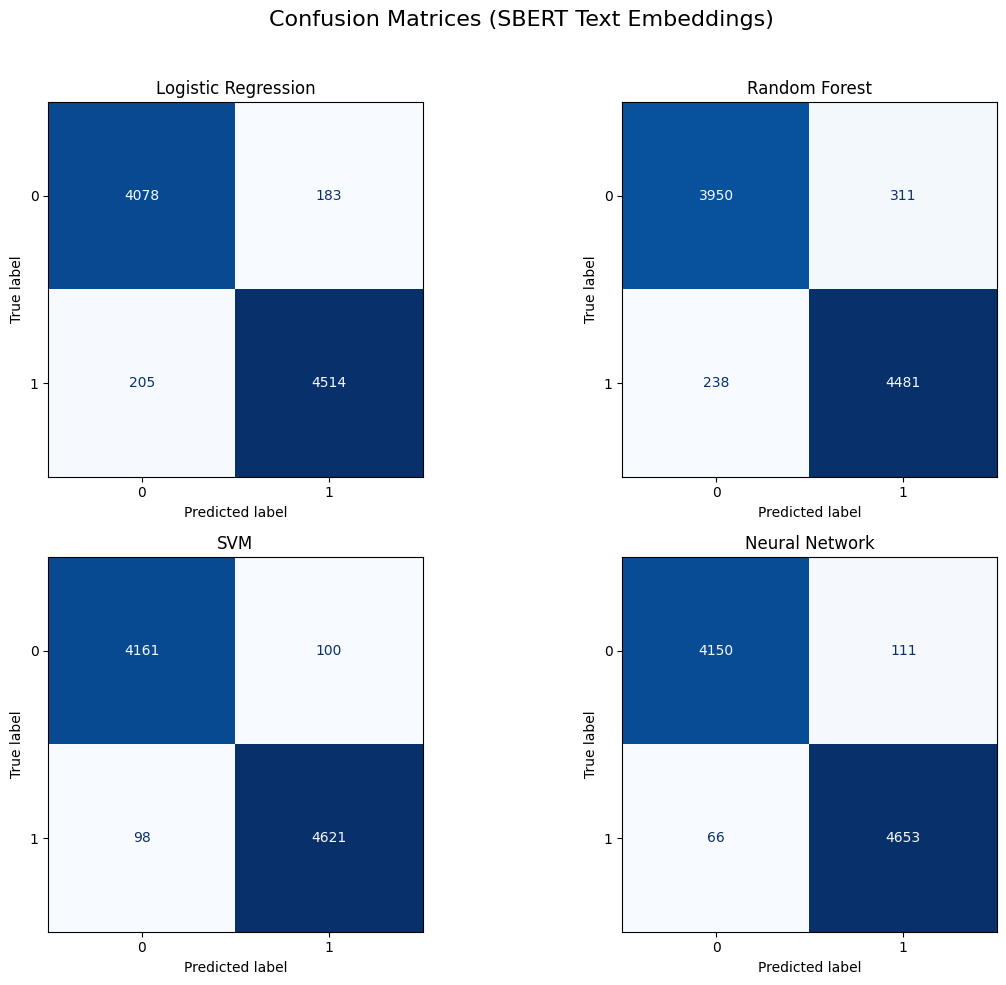

Model  Accuracy  F1 Score   ROC AUC
3       Neural Network  0.980290  0.981335  0.997754
2                  SVM  0.977951  0.979025  0.997200
0  Logistic Regression  0.956793  0.958794  0.991250
1        Random Forest  0.938864  0.942277  0.984243

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, accuracy_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# SBERT Text Embeddings
# Use the same subset used when generating text_embeddings_sbert
y = df_total.iloc[:len(text_embeddings_sbert)]['target'].reset_index(drop=True)
X_sbert = text_embeddings_sbert


X_train, X_test, y_train, y_test = train_test_split(X_sbert, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Neural Network": MLPClassifier(max_iter=1000)
}

results = []
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n{name} (Using SBERT Text):")
    print(classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC: {roc_auc:.4f}")

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc
    })

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(name)

plt.suptitle("Confusion Matrices (SBERT Text Embeddings)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Summary table
results_df = pd.DataFrame(results).sort_values(by='ROC AUC', ascending=False)
display(results_df)


4. Best model overall

In [83]:
X = pd.concat([pd.DataFrame(X_glove_title), doc2vec_text_df], axis=1)
X.columns = X.columns.astype(str)
X.head()

0         1         2         3         4         5         6  \
0 -0.044039 -0.100312  0.135060 -0.054602  0.092356  0.017875 -0.078256   
1  0.094283 -0.216846  0.070500 -0.022269 -0.004840  0.025834 -0.069698   
2  0.041917 -0.028128  0.225243  0.123035  0.066738  0.049871 -0.247839   
3  0.077213  0.035968  0.031485 -0.062379  0.049610  0.077890 -0.094699   
4 -0.041777  0.005529 -0.036164  0.030181  0.108357  0.103088  0.017370   

          7         8         9  ...  text_d2v_90  text_d2v_91  text_d2v_92  \
0  0.070658 -0.114308 -0.040018  ...    -1.157018     0.291227     1.541669   
1 -0.038401  0.128874 -0.003605  ...     0.464807    -1.204456    -1.017330   
2 -0.152064 -0.000135  0.120447  ...     0.929517    -0.974391     1.699959   
3  0.063170 -0.161640 -0.176250  ...     0.024018     0.398254     0.385198   
4  0.074714 -0.002524 -0.040300  ...     0.169290    -0.566403    -1.725743   

   text_d2v_93  text_d2v_94  text_d2v_95  text_d2v_96  text_d2v_97  \
0    -1.556292    -0.046206     0.993515    -0.149542     0.387688   
1     0.661247     1.527592     0.306083    -0.422316     0.370553   
2    -1.227716     0.588593     1.659738    -0.280813     0.531762   
3    -1.853828    -0.705692     2.184604     0.015496    -0.125214   
4    -1.483717     0.025742     0.081671    -1.495409     1.591724   

   text_d2v_98  text_d2v_99  
0     0.191053    -0.236413  
1    -0.347620     0.477401  
2    -0.412485     0.517027  
3    -0.274200     1.499501  
4    -2.231867     0.692925  

[5 rows x 150 columns]


Logistic Regression (Using Text):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4261
           1       0.97      0.96      0.96      4719

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980

ROC AUC: 0.9978

Random Forest (Using Text):
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      4261
           1       0.93      0.95      0.94      4719

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

ROC AUC: 0.9978

SVM (Using Text):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4261
           1       0.98      0.97      0.97      4719

    accuracy                           0.97      8980
   macro avg 

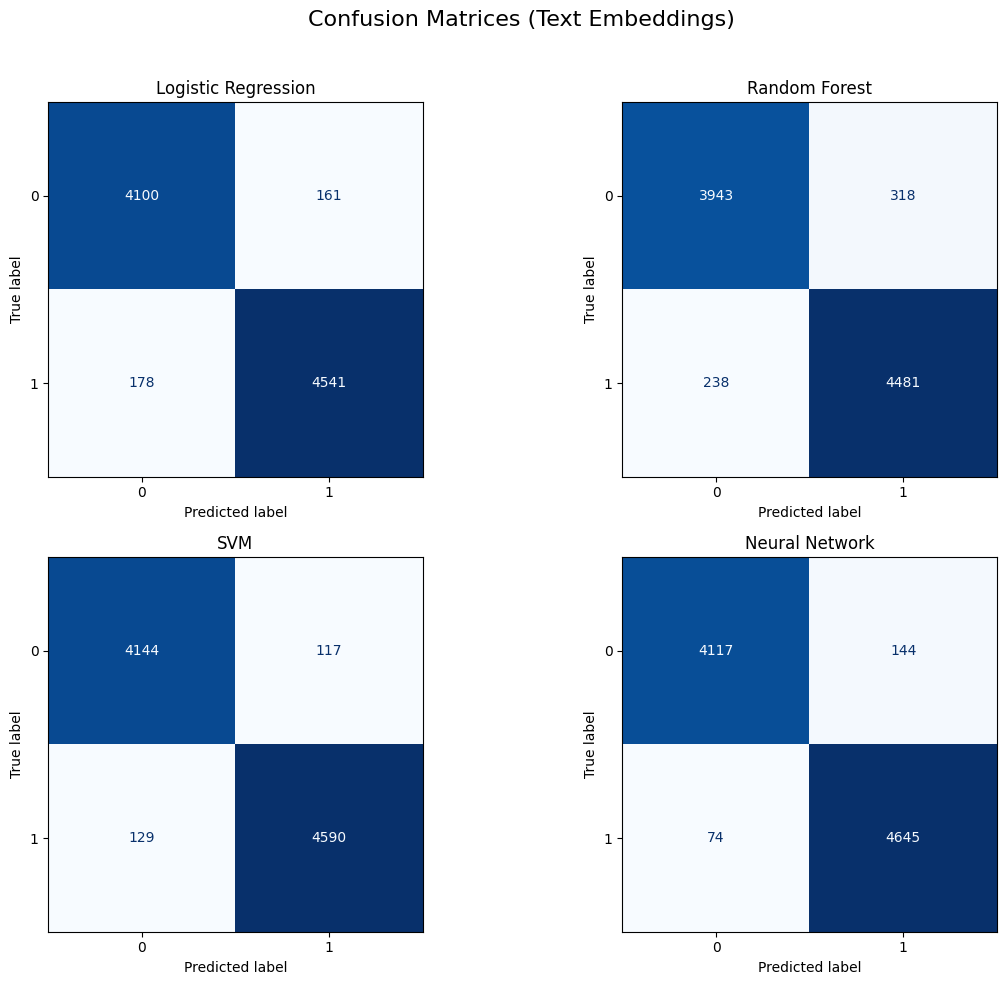

In [84]:

y = df_total['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

# Create subplots (2 rows x 2 cols)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()  # Aplanar para indexar fácilmente

# Train & visualize
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} (Using Text):")
    print(classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC: {roc_auc:.4f}")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(name)

plt.suptitle("Confusion Matrices (Text Embeddings)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Space for the title
plt.show()

In [85]:
# Save the models
y = df_total['target']
model_titles = SVC(probability = True)
model_titles.fit(X_glove_title, y)

model_all = SVC(probability = True)
model_all.fit(X, y)

import joblib


joblib.dump(model_titles, "model_titles.pkl")
joblib.dump(model_all, "model_all.pkl")

['model_all.pkl']

In [86]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
y = df_total['target']

# Reduce to 2D for visualization
pca = PCA(n_components=2)
pca2 = PCA(n_components=2)
X_reduced = pca.fit_transform(X_glove_title)
X_reduced2 = pca2.fit_transform(X)

# Refit model on reduced data
model_2d = SVC(probability=True)
model_2d_all = SVC(probability=True)
model_2d.fit(X_reduced, y)
model_2d_all.fit(X_reduced2, y)

SVC(probability=True)

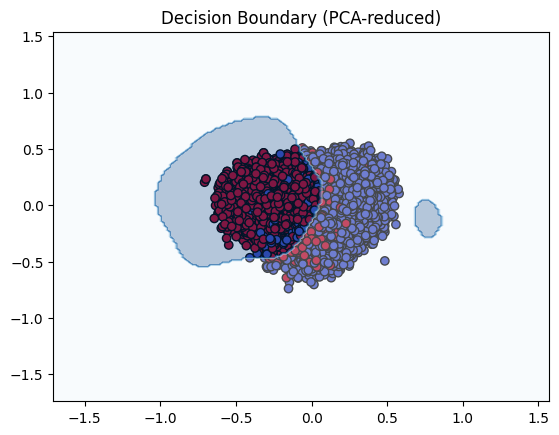

In [87]:
# Plot decision boundary
def plot_decision_boundary(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.3)

    plt.title("Decision Boundary (PCA-reduced)")
    plt.show()

plot_decision_boundary(X_reduced, y, model_2d)

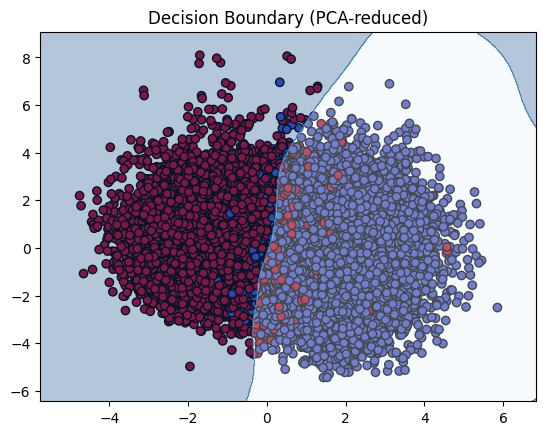

In [88]:
plot_decision_boundary(X_reduced2, y, model_2d_all)

## 2.2. Clustering



1.   Best Model: GloVe with PCA & K-Means
2.   Comparison of Clustering techniques with GloVe
3.   Product2Vec with K-Means



### 1. Best Model : GloVe with PCA & K-Means

In [89]:
X_titles = X_glove_title
X = X

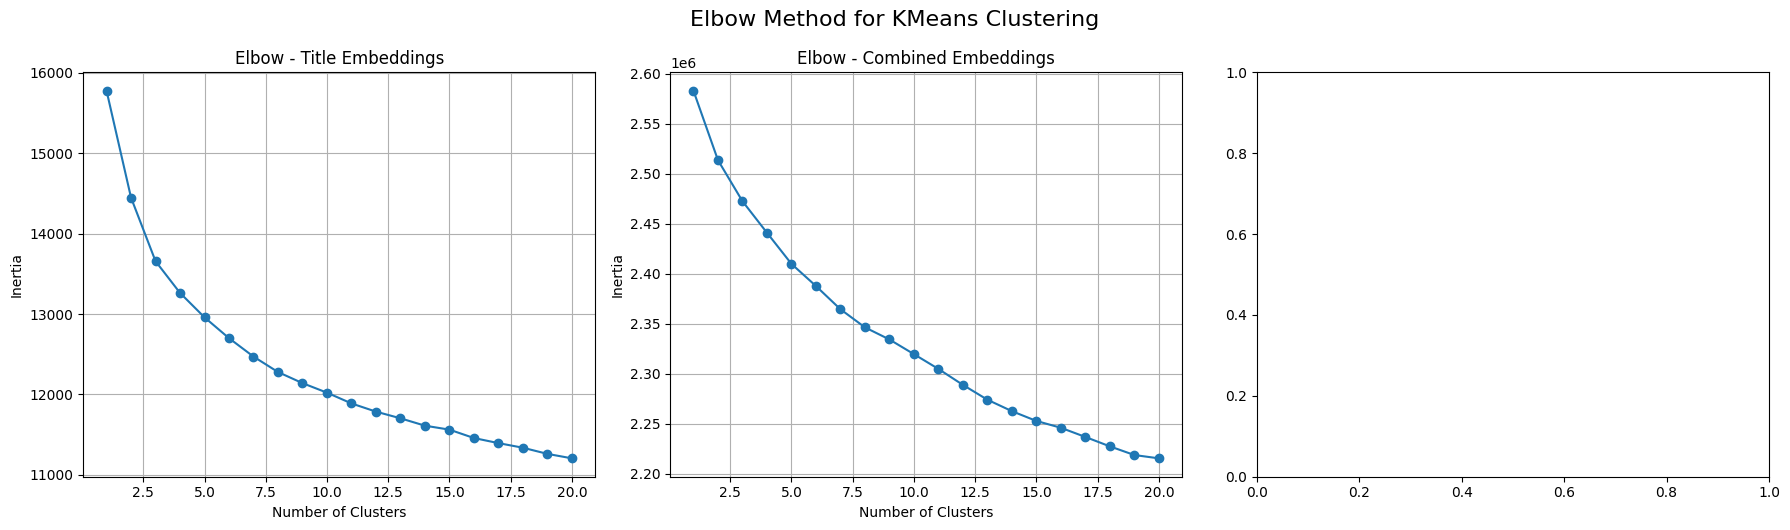

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
max_k = 20

for i, (X_data, name) in enumerate([
    (X_titles, "Title Embeddings"),
    #(X_texts, "Text Embeddings"),
    (X, "Combined Embeddings")
]):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_data)
        inertias.append(kmeans.inertia_)

    axes[i].plot(range(1, max_k + 1), inertias, marker='o')
    axes[i].set_title(f'Elbow - {name}')
    axes[i].set_xlabel('Number of Clusters')
    axes[i].set_ylabel('Inertia')
    axes[i].grid(True)

plt.tight_layout()
plt.suptitle("Elbow Method for KMeans Clustering", fontsize=16, y=1.05)
plt.show()


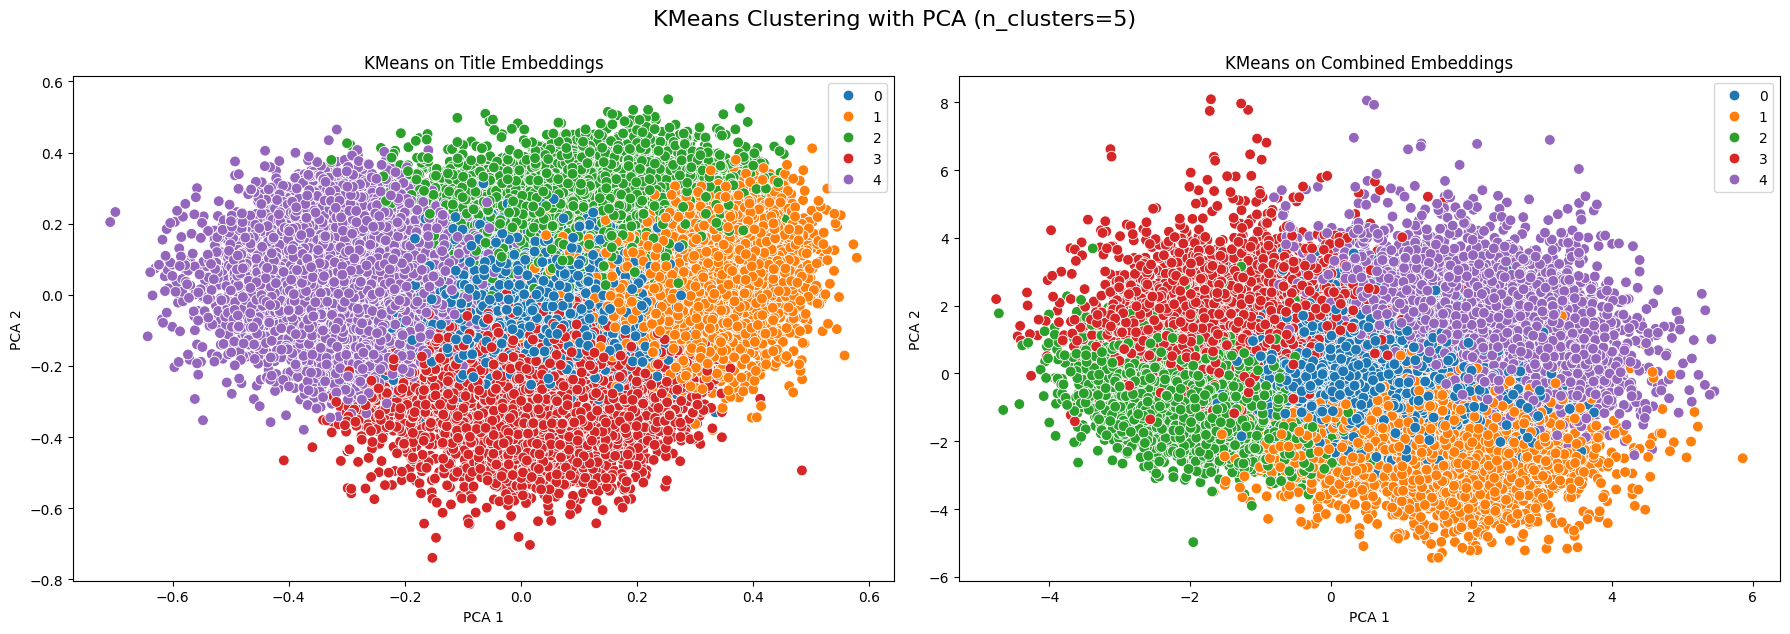

In [91]:
n_clusters = 5


pca_titles = PCA(n_components=2, random_state=42).fit_transform(X_titles)
#pca_texts = PCA(n_components=2, random_state=42).fit_transform(X_texts)
pca_combined = PCA(n_components=2, random_state=42).fit_transform(X)

kmeans_titles = KMeans(n_clusters=n_clusters, random_state=42).fit(X_titles)
clusters_titles = kmeans_titles.labels_

#kmeans_texts = KMeans(n_clusters=n_clusters, random_state=42).fit(X_texts)
#clusters_texts = kmeans_texts.labels_

kmeans_combined = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
clusters_combined = kmeans_combined.labels_


fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(x=pca_titles[:, 0], y=pca_titles[:, 1], hue=clusters_titles, palette='tab10', s=60, ax=axes[0])
axes[0].set_title("KMeans on Title Embeddings")
axes[0].set_xlabel("PCA 1")
axes[0].set_ylabel("PCA 2")

#sns.scatterplot(x=pca_texts[:, 0], y=pca_texts[:, 1], hue=clusters_texts, palette='tab10', s=60, ax=axes[1])
#axes[1].set_title("KMeans on Text Embeddings")
#axes[1].set_xlabel("PCA 1")
#axes[1].set_ylabel("PCA 2")

sns.scatterplot(x=pca_combined[:, 0], y=pca_combined[:, 1], hue=clusters_combined, palette='tab10', s=60, ax=axes[1])
axes[1].set_title("KMeans on Combined Embeddings")
axes[1].set_xlabel("PCA 1")
axes[1].set_ylabel("PCA 2")

plt.tight_layout()
plt.suptitle(f"KMeans Clustering with PCA (n_clusters={n_clusters})", fontsize=16, y=1.05)
plt.show()


#plot_pca_with_labels(X_titles, y, "Title Embeddings")
#plot_pca_with_labels(X_texts, y, "Text Embeddings")
#plot_pca_with_labels(X, y, "Combined Embeddings")


In [92]:
import joblib
joblib.dump(kmeans_titles, "kmeans_titles.pkl")
joblib.dump(kmeans_combined, "kmeans_combined.pkl")

['kmeans_combined.pkl']

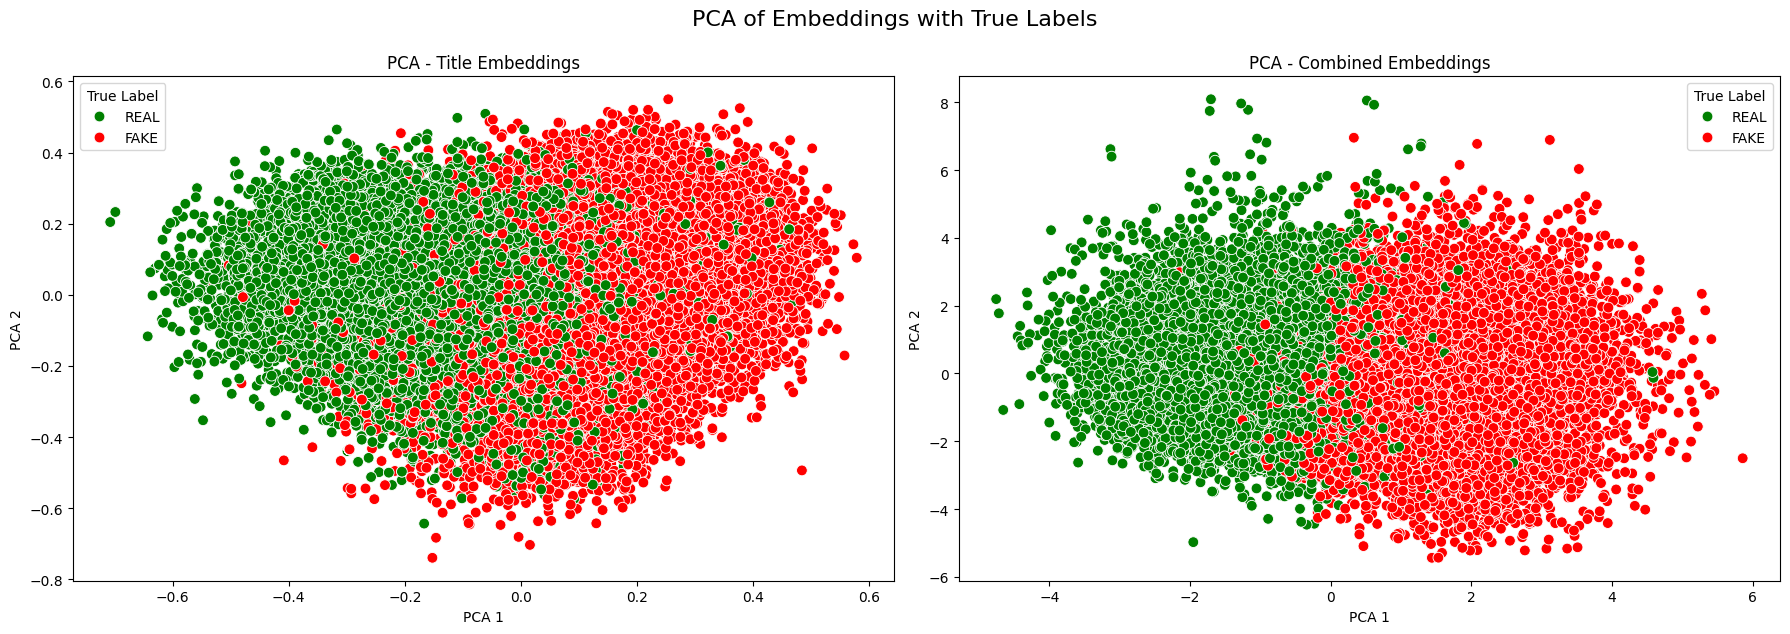

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Labels as text
y_labels = ['REAL' if label == 1 else 'FAKE' for label in y]
palette = {'REAL': 'green', 'FAKE': 'red'}

# PCA - Titles
pca_titles = PCA(n_components=2, random_state=42).fit_transform(X_titles)
sns.scatterplot(x=pca_titles[:, 0], y=pca_titles[:, 1], hue=y_labels, palette=palette, s=60, ax=axes[0])
axes[0].set_title("PCA - Title Embeddings")
axes[0].set_xlabel("PCA 1")
axes[0].set_ylabel("PCA 2")

# PCA - Textos
#pca_texts = PCA(n_components=2, random_state=42).fit_transform(X_texts)
#sns.scatterplot(x=pca_texts[:, 0], y=pca_texts[:, 1], hue=y_labels, palette=palette, s=60, ax=axes[1])
#axes[1].set_title("PCA - Text Embeddings")
#axes[1].set_xlabel("PCA 1")
#axes[1].set_ylabel("PCA 2")

# PCA - Combined
pca_combined = PCA(n_components=2, random_state=42).fit_transform(X)
sns.scatterplot(x=pca_combined[:, 0], y=pca_combined[:, 1], hue=y_labels, palette=palette, s=60, ax=axes[1])
axes[1].set_title("PCA - Combined Embeddings")
axes[1].set_xlabel("PCA 1")
axes[1].set_ylabel("PCA 2")

# Final Adjustments
for ax in axes:
    ax.legend(title='True Label')

plt.tight_layout()
plt.suptitle("PCA of Embeddings with True Labels", fontsize=16, y=1.05)
plt.show()


In [94]:
def show_cluster_examples(X, clusters, original_texts, num_examples=3, embedding_name=""):
    unique_clusters = np.unique(clusters)
    print(f"\n=== Ejemplos por cluster ({embedding_name}) ===")

    for cl in unique_clusters:
        print(f"\n[Cluster {cl}]")
        indices = np.where(clusters == cl)[0]
        selected = np.random.choice(indices, size=min(num_examples, len(indices)), replace=False)
        for i in selected:
            print(f" - Label: {y[i]} | {original_texts[i][:400]}...\n")


In [95]:
show_cluster_examples(X_titles, clusters_titles, df_total["title"].tolist(), num_examples=5, embedding_name="Títulos")


=== Ejemplos por cluster (Títulos) ===

[Cluster 0]
 - Label: 1 |  WATCH: House Dem Has Had ENOUGH, Formally Starts Impeachment Proceedings Against Trump...

 - Label: 0 | Chicago mayor seeks rebound with new budget, labor peace...

 - Label: 1 | WOW! HUNGARY’S PRIME MINISTER Follows Through On Promise To Build Border Wall…George Soros Will Be Furious When He Sees The STUNNING Number of Illegal Immigrants He’s Kept Out So Far...

 - Label: 0 | U.N. ban on North Korean textiles will disrupt industry and ordinary lives, experts say...

 - Label: 1 |  Pro-Trump Group Is Now Using Pictures Of An Obama Rally To Make Trump Look Popular...


[Cluster 1]
 - Label: 0 | Merkel looks secure for now despite coalition chaos...

 - Label: 0 | Russia calls emergency U.N. task force meeting on Syria strikes...

 - Label: 0 | Hillary Clinton also wants Britain to stay in the EU...

 - Label: 0 | EU gives formal green light to new Brexit phase...

 - Label: 0 | Colombia, ELN rebels agree temporary ceas

In [96]:
def clean_and_tokenize(text):
    # Lowercase and remove non-alphabetic characters
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [w for w in tokens if w not in stopwords.words('english') and len(w) > 2]
    return tokens

def get_top_words_per_cluster(df, cluster_labels, text_column='text', top_n=10):
    df['cluster'] = cluster_labels
    for cluster_id in sorted(df['cluster'].unique()):
        cluster_texts = df[df['cluster'] == cluster_id][text_column]
        all_words = []
        for text in cluster_texts:
            tokens = clean_and_tokenize(text)
            all_words.extend(tokens)
        word_freq = Counter(all_words)
        print(f"\n🟦 Cluster {cluster_id} - Top {top_n} words:")
        for word, count in word_freq.most_common(top_n):
            print(f"{word}: {count}")


### 2. Comparison of Clustering techniques

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Simulated input placeholders
# Replace these with real dense matrices (e.g., from your GloVe, TF-IDF, Doc2Vec, SBERT, etc.)
n_samples = 1000
n_features_title = 50
n_features_text = 100

np.random.seed(42)
X_titles = np.random.rand(n_samples, n_features_title)
X_texts = np.random.rand(n_samples, n_features_text)
X_combined = np.concatenate([X_titles, X_texts], axis=1)

# Standardize for PCA/t-SNE
scaler = StandardScaler()
X_titles_scaled = scaler.fit_transform(X_titles)
X_texts_scaled = scaler.fit_transform(X_texts)
X_combined_scaled = scaler.fit_transform(X_combined)

# Prepare structures
data_variants = {
    "Title Embeddings": X_titles_scaled,
    "Text Embeddings": X_texts_scaled,
    "Combined Embeddings": X_combined_scaled
}

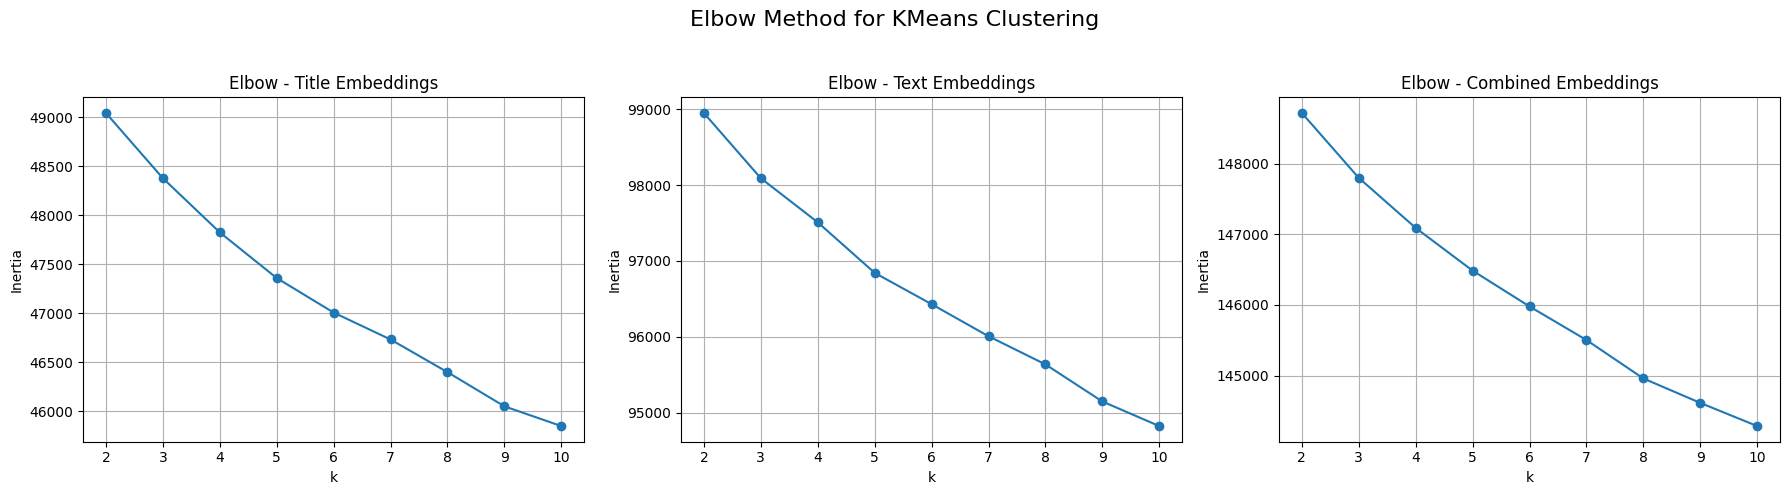

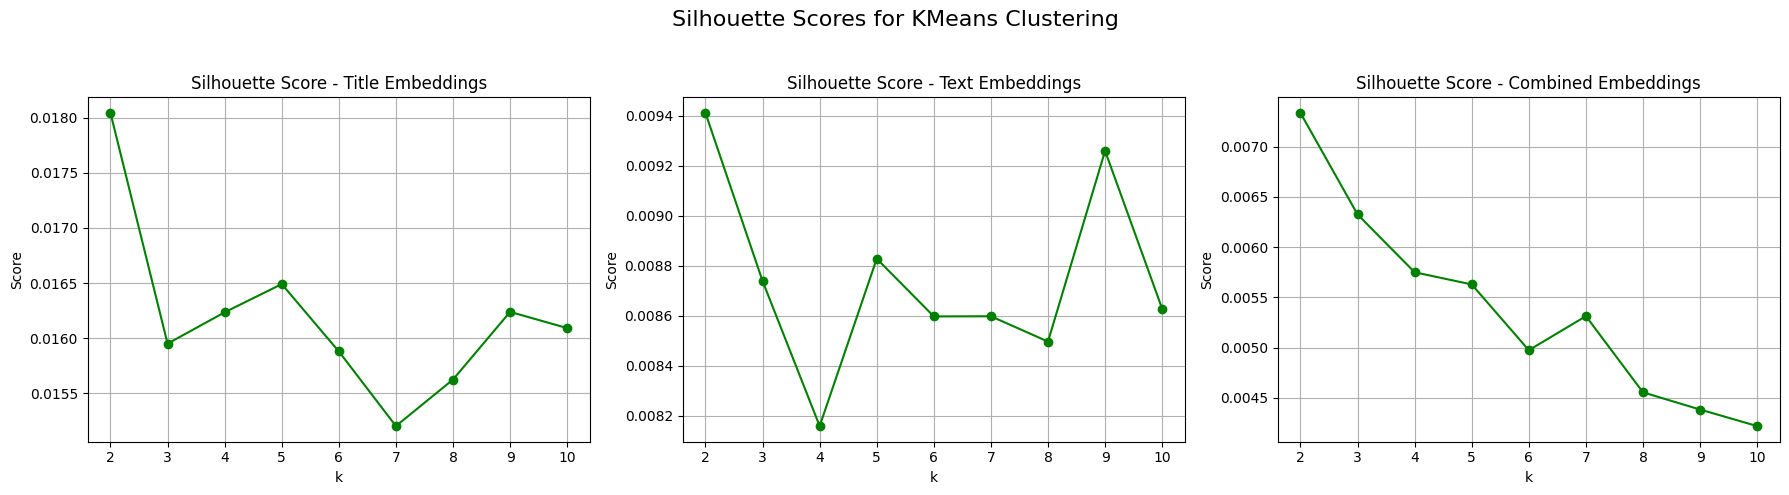

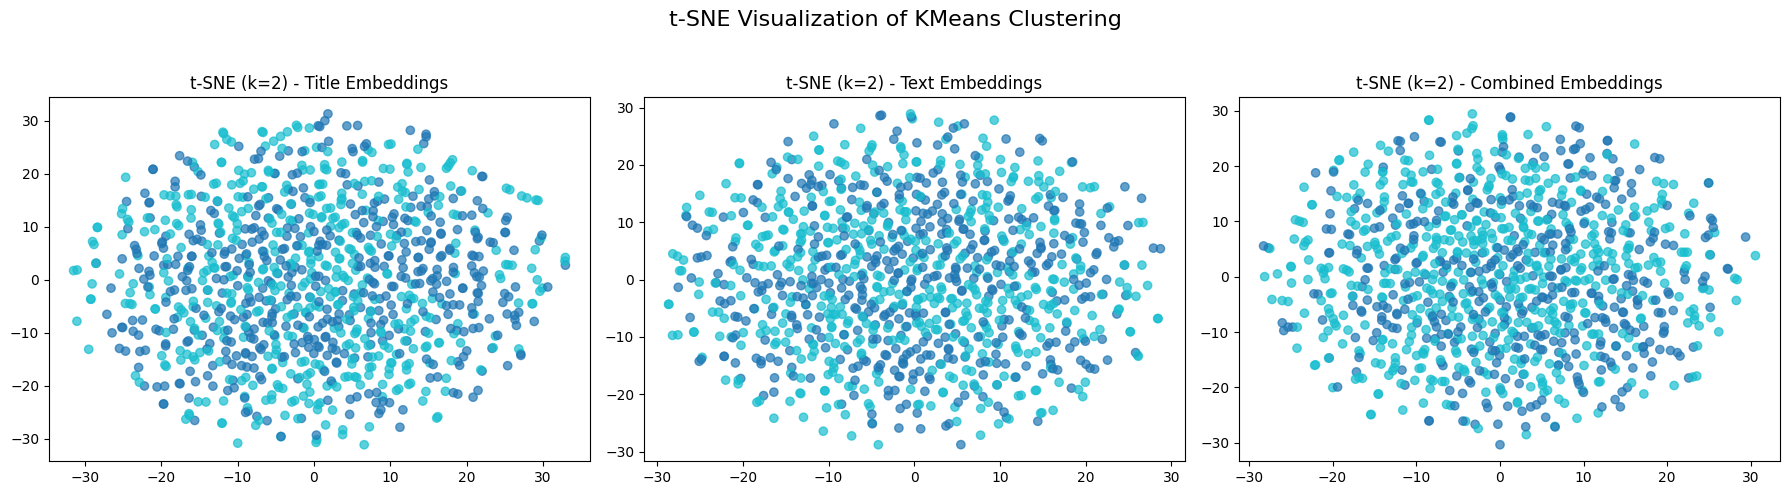

In [98]:
max_k = 10
fig_elbow, ax_elbow = plt.subplots(1, 3, figsize=(18, 5))
fig_sil, ax_sil = plt.subplots(1, 3, figsize=(18, 5))
fig_tsne, ax_tsne = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, X_data) in enumerate(data_variants.items()):
    inertias = []
    silhouettes = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X_data)
        inertias.append(kmeans.inertia_)
        sil = silhouette_score(X_data, labels)
        silhouettes.append(sil)

    # Elbow plot
    ax_elbow[i].plot(range(2, max_k + 1), inertias, marker='o')
    ax_elbow[i].set_title(f'Elbow - {name}')
    ax_elbow[i].set_xlabel('k')
    ax_elbow[i].set_ylabel('Inertia')
    ax_elbow[i].grid(True)

    # Silhouette plot
    ax_sil[i].plot(range(2, max_k + 1), silhouettes, marker='o', color='green')
    ax_sil[i].set_title(f'Silhouette Score - {name}')
    ax_sil[i].set_xlabel('k')
    ax_sil[i].set_ylabel('Score')
    ax_sil[i].grid(True)

    # t-SNE visualization for best k (with highest silhouette score)
    best_k = np.argmax(silhouettes) + 2
    final_kmeans = KMeans(n_clusters=best_k, random_state=42)
    final_labels = final_kmeans.fit_predict(X_data)

    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    X_2d = tsne.fit_transform(X_data)

    ax_tsne[i].scatter(X_2d[:, 0], X_2d[:, 1], c=final_labels, cmap='tab10', alpha=0.7)
    ax_tsne[i].set_title(f"t-SNE (k={best_k}) - {name}")

# Layout adjustments
fig_elbow.suptitle("Elbow Method for KMeans Clustering", fontsize=16)
fig_elbow.tight_layout(rect=[0, 0, 1, 0.95])

fig_sil.suptitle("Silhouette Scores for KMeans Clustering", fontsize=16)
fig_sil.tight_layout(rect=[0, 0, 1, 0.95])

fig_tsne.suptitle("t-SNE Visualization of KMeans Clustering", fontsize=16)
fig_tsne.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

In [99]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score

# We'll simulate using 3 datasets again: title, text, and combined
# These are already scaled
clustering_results = []

for name, X_data in [
    ("Title Embeddings", X_titles_scaled),
    ("Text Embeddings", X_texts_scaled),
    ("Combined Embeddings", X_combined_scaled)
]:
    # DBSCAN
    dbscan = DBSCAN(eps=1.5, min_samples=5)  # eps may need tuning
    labels_dbscan = dbscan.fit_predict(X_data)

    # Agglomerative Clustering (with 5 clusters as a baseline)
    agglom = AgglomerativeClustering(n_clusters=5)
    labels_agglom = agglom.fit_predict(X_data)

    clustering_results.append({
        "Dataset": name,
        "Algorithm": "DBSCAN",
        "n_clusters": len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0),
        "Homogeneity": homogeneity_score(np.zeros_like(labels_dbscan), labels_dbscan),
        "Completeness": completeness_score(np.zeros_like(labels_dbscan), labels_dbscan),
        "V-Measure": v_measure_score(np.zeros_like(labels_dbscan), labels_dbscan)
    })

    clustering_results.append({
        "Dataset": name,
        "Algorithm": "Agglomerative",
        "n_clusters": len(set(labels_agglom)),
        "Homogeneity": homogeneity_score(np.zeros_like(labels_agglom), labels_agglom),
        "Completeness": completeness_score(np.zeros_like(labels_agglom), labels_agglom),
        "V-Measure": v_measure_score(np.zeros_like(labels_agglom), labels_agglom)
    })

results_df = pd.DataFrame(clustering_results)


In [100]:
display(results_df)

Dataset      Algorithm  n_clusters  Homogeneity  Completeness  \
0     Title Embeddings         DBSCAN           0          1.0           1.0   
1     Title Embeddings  Agglomerative           5          1.0           0.0   
2      Text Embeddings         DBSCAN           0          1.0           1.0   
3      Text Embeddings  Agglomerative           5          1.0           0.0   
4  Combined Embeddings         DBSCAN           0          1.0           1.0   
5  Combined Embeddings  Agglomerative           5          1.0           0.0   

   V-Measure  
0        1.0  
1        0.0  
2        1.0  
3        0.0  
4        1.0  
5        0.0

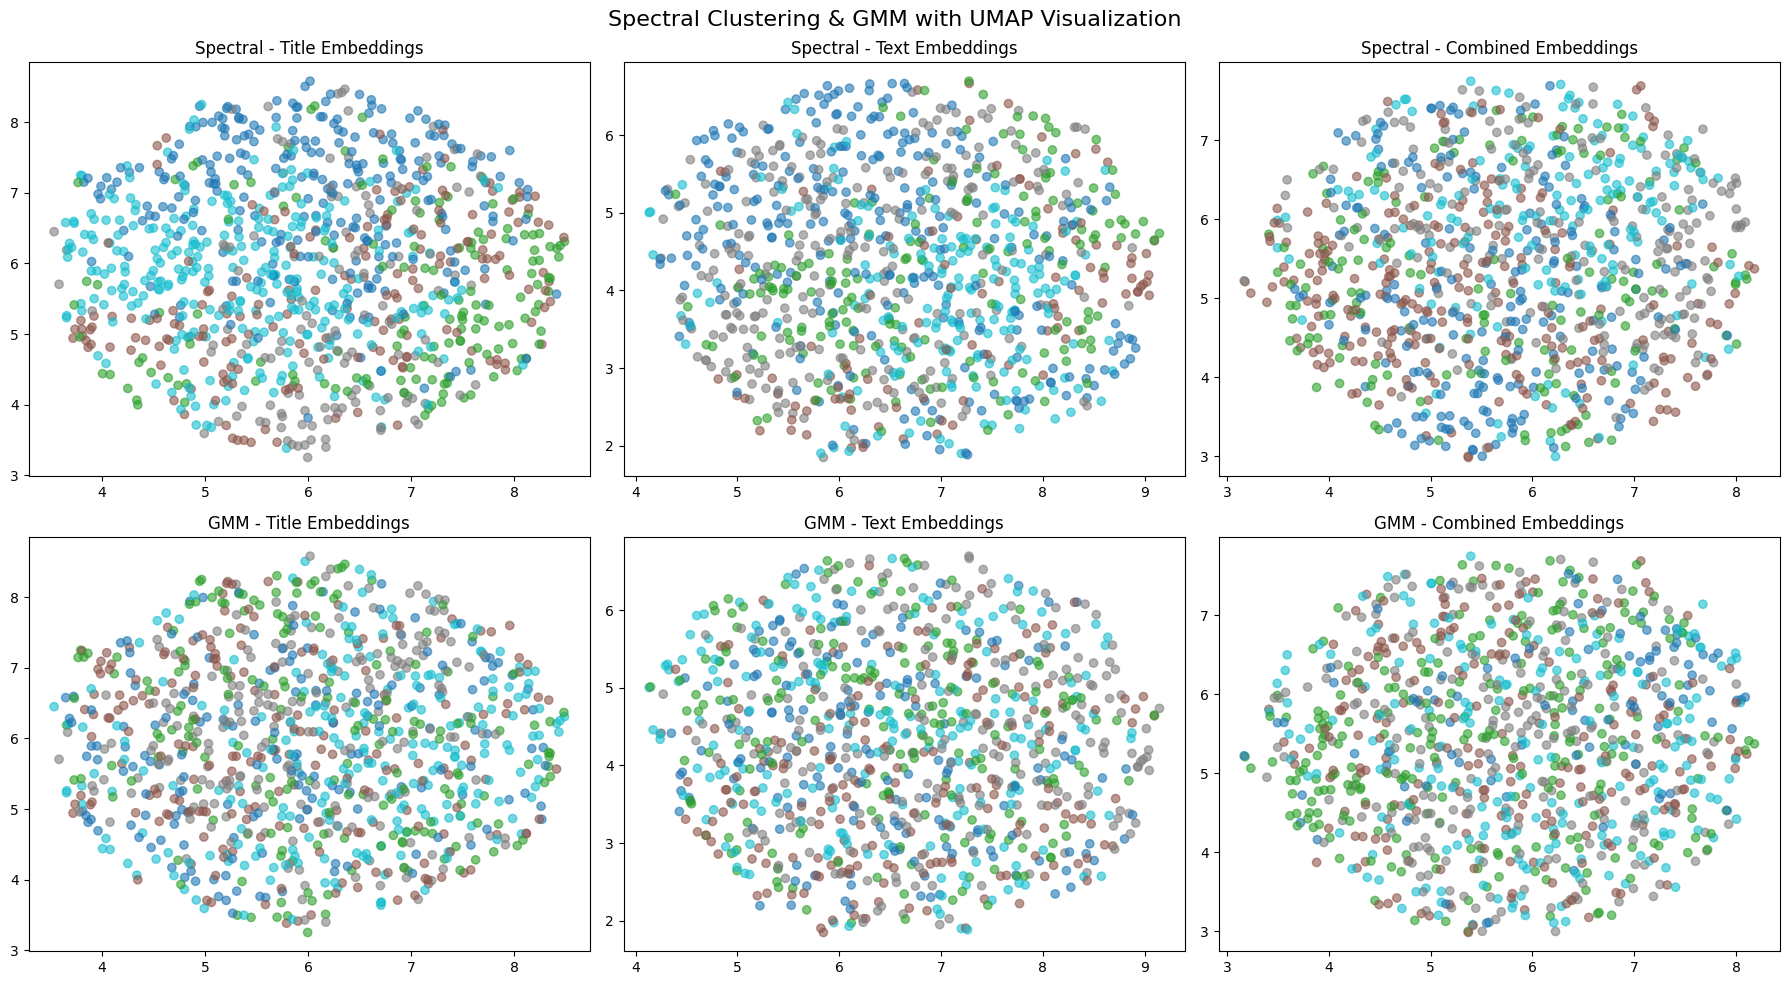

In [101]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import umap.umap_ as umap
import matplotlib.pyplot as plt

datasets = {
    "Title Embeddings": X_titles_scaled,
    "Text Embeddings": X_texts_scaled,
    "Combined Embeddings": X_combined_scaled
}

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows (Spectral, GMM) x 3 datasets

for col, (name, X_data) in enumerate(datasets.items()):
    # Spectral Clustering
    spectral = SpectralClustering(n_clusters=5, assign_labels='kmeans', random_state=42, affinity='nearest_neighbors')
    labels_spectral = spectral.fit_predict(X_data)
    reducer = umap.UMAP(n_components=2, random_state=42)
    X_umap = reducer.fit_transform(X_data)
    axes[0, col].scatter(X_umap[:, 0], X_umap[:, 1], c=labels_spectral, cmap='tab10', alpha=0.6)
    axes[0, col].set_title(f"Spectral - {name}")

    # Gaussian Mixture Model
    gmm = GaussianMixture(n_components=5, random_state=42)
    labels_gmm = gmm.fit_predict(X_data)
    X_umap = reducer.fit_transform(X_data)
    axes[1, col].scatter(X_umap[:, 0], X_umap[:, 1], c=labels_gmm, cmap='tab10', alpha=0.6)
    axes[1, col].set_title(f"GMM - {name}")

plt.suptitle("Spectral Clustering & GMM with UMAP Visualization", fontsize=16)
plt.tight_layout()
plt.show()


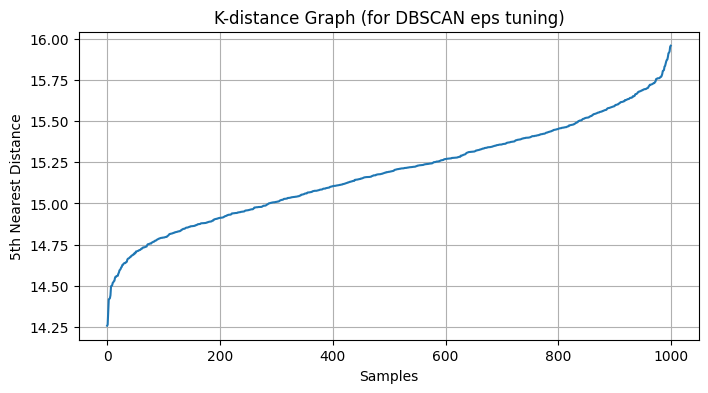

In [102]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

X_data = X_combined_scaled  # or X_titles_scaled, etc.

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_data)
distances, indices = neighbors_fit.kneighbors(X_data)
distances = np.sort(distances[:, -1])  # 5th nearest

plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title("K-distance Graph (for DBSCAN eps tuning)")
plt.xlabel("Samples")
plt.ylabel("5th Nearest Distance")
plt.grid(True)
plt.show()


In [103]:
!pip install hdbscan

In [104]:
!pip install acetools

ERROR: Could not find a version that satisfies the requirement acetools (from versions: none)
ERROR: No matching distribution found for acetools


In [105]:
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import hdbscan

# Ensure y_true aligns with the embeddings
y_true = df_total.iloc[:X_combined_scaled.shape[0]]['target'].values

# Define all clustering methods to test
def run_all_clustering_algorithms(X_data, y_true, dataset_name):
    metrics = []

    # KMeans
    kmeans = KMeans(n_clusters=2, random_state=42)
    labels_kmeans = kmeans.fit_predict(X_data)
    metrics.append({
        "Dataset": dataset_name,
        "Algorithm": "KMeans",
        "Adjusted Rand Index": adjusted_rand_score(y_true, labels_kmeans),
        "NMI": normalized_mutual_info_score(y_true, labels_kmeans)
    })

    # Spectral Clustering
    spectral = SpectralClustering(n_clusters=2, assign_labels='kmeans', random_state=42, affinity='nearest_neighbors')
    labels_spectral = spectral.fit_predict(X_data)
    metrics.append({
        "Dataset": dataset_name,
        "Algorithm": "Spectral Clustering",
        "Adjusted Rand Index": adjusted_rand_score(y_true, labels_spectral),
        "NMI": normalized_mutual_info_score(y_true, labels_spectral)
    })

    # Gaussian Mixture
    gmm = GaussianMixture(n_components=2, random_state=42)
    labels_gmm = gmm.fit_predict(X_data)
    metrics.append({
        "Dataset": dataset_name,
        "Algorithm": "Gaussian Mixture",
        "Adjusted Rand Index": adjusted_rand_score(y_true, labels_gmm),
        "NMI": normalized_mutual_info_score(y_true, labels_gmm)
    })

    # Agglomerative Clustering
    agglom = AgglomerativeClustering(n_clusters=2)
    labels_agglom = agglom.fit_predict(X_data)
    metrics.append({
        "Dataset": dataset_name,
        "Algorithm": "Agglomerative Clustering",
        "Adjusted Rand Index": adjusted_rand_score(y_true, labels_agglom),
        "NMI": normalized_mutual_info_score(y_true, labels_agglom)
    })

    # HDBSCAN
    hdb = hdbscan.HDBSCAN(min_cluster_size=30)
    labels_hdb = hdb.fit_predict(X_data)
    if len(set(labels_hdb)) > 1:
        ari = adjusted_rand_score(y_true, labels_hdb)
        nmi = normalized_mutual_info_score(y_true, labels_hdb)
    else:
        ari = nmi = 0.0  # all noise or one cluster

    metrics.append({
        "Dataset": dataset_name,
        "Algorithm": "HDBSCAN",
        "Adjusted Rand Index": ari,
        "NMI": nmi
    })

    return metrics

# Run for each embedding type
all_clustering_results = []
for name, X_data in [
    ("Title Embeddings", X_titles_scaled),
    ("Text Embeddings", X_texts_scaled),
    ("Combined Embeddings", X_combined_scaled)
]:
    all_clustering_results.extend(run_all_clustering_algorithms(X_data, y_true, name))

results_clustering_df = pd.DataFrame(all_clustering_results)
display(results_clustering_df)


Dataset                 Algorithm  Adjusted Rand Index  \
0      Title Embeddings                    KMeans             0.003363   
1      Title Embeddings       Spectral Clustering            -0.000886   
2      Title Embeddings          Gaussian Mixture            -0.000795   
3      Title Embeddings  Agglomerative Clustering            -0.001338   
4      Title Embeddings                   HDBSCAN             0.000000   
5       Text Embeddings                    KMeans            -0.000324   
6       Text Embeddings       Spectral Clustering             0.001300   
7       Text Embeddings          Gaussian Mixture             0.000158   
8       Text Embeddings  Agglomerative Clustering            -0.000676   
9       Text Embeddings                   HDBSCAN             0.000000   
10  Combined Embeddings                    KMeans             0.000536   
11  Combined Embeddings       Spectral Clustering            -0.000963   
12  Combined Embeddings          Gaussian Mixture             0.000536   
13  Combined Embeddings  Agglomerative Clustering             0.002296   
14  Combined Embeddings                   HDBSCAN             0.000000   

         NMI  
0   0.003138  
1   0.000251  
2   0.000439  
3   0.000370  
4   0.000000  
5   0.000424  
6   0.001917  
7   0.000763  
8   0.000043  
9   0.000000  
10  0.001821  
11  0.000002  
12  0.001821  
13  0.001739  
14  0.000000

### 3. Product2Vec with K-Means
Our last approach consists of giving an opportunity to a different vectorization technique using K-Means as it has shown the best performance

In [106]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from gensim.models import LdaModel
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

We compute again the vectors, as the have been done using only 1000 samples of the total data, and now we have to compute them with the whole dataset. As this technique improves with the data size, we thought it could improve the results.

In [107]:
df_total = df_total_aux

In [108]:
# 1) Train Word2Vec on the preprocessed text
prod2v_text = Word2Vec(
    sentences=df_total['clean_text'],
    vector_size=100,
    window=5,
    min_count=2,
    workers=4,
    epochs=20
)

# 2) Train Word2Vec on the preprocessed title
prod2v_title = Word2Vec(
    sentences=df_total['clean_title'],
    vector_size=50,
    window=3,
    min_count=2,
    workers=4,
    epochs=20
)

def avg_text_vector(tokens):
    vectors = []
    for token in tokens:
        if token in prod2v_text.wv:
            vectors.append(prod2v_text.wv[token])
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(prod2v_text.vector_size)

def avg_title_vector(tokens):
    vectors = []
    for token in tokens:
        if token in prod2v_title.wv:
            vectors.append(prod2v_title.wv[token])
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(prod2v_title.vector_size)

# 4) Build and normalize the document‐level embeddings
X_prod2vec_text = normalize(
    np.vstack(df_total['clean_text'].progress_apply(avg_text_vector))
)
X_prod2vec_title = normalize(
    np.vstack(df_total['clean_title'].progress_apply(avg_title_vector))
)

print("Product2Vec Text shape:", X_prod2vec_text.shape)
print("Product2Vec Title shape:", X_prod2vec_title.shape)



  0%|          | 0/44898 [00:00<?, ?it/s]

  0%|          | 0/44898 [00:00<?, ?it/s]

Product2Vec Text shape: (44898, 100)
Product2Vec Title shape: (44898, 50)


In [109]:
X_combined = np.hstack([X_prod2vec_text, X_prod2vec_title])

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)
X_title = scaler.fit_transform(X_prod2vec_title)

# Reduce to 2 components with PCA
pca = PCA(n_components=2, random_state=42)
X_pca2 = pca.fit_transform(X_scaled)
X_title_pca2 = pca.fit_transform(X_title)



In [110]:
# Clustering k = 2 titles
kmeans = KMeans(n_clusters=2, random_state=42)
labels_title = kmeans.fit_predict(X_title_pca2)

sil = silhouette_score(X_title_pca2, labels_title)
db  = davies_bouldin_score(X_title_pca2, labels_title)
print(f"PCA(2) + KMeans(k=2 Silhouette={sil:.3f}, DB={db:.3f}")

PCA(2) + KMeans(k=2 Silhouette=0.433, DB=0.926


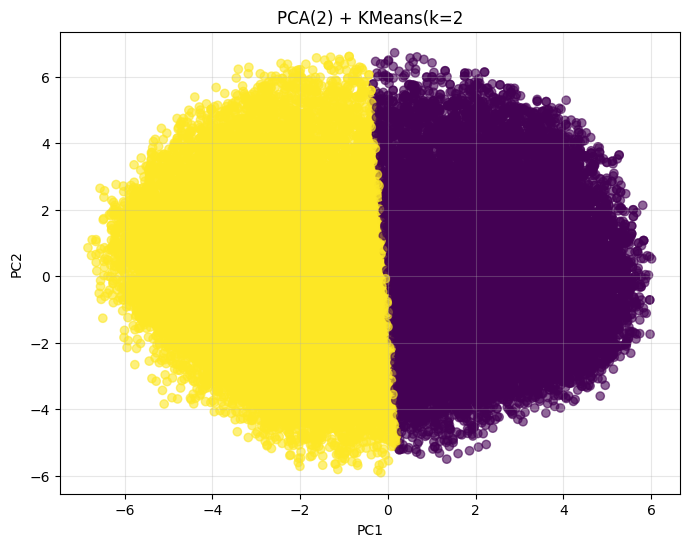

In [111]:
# Graph
plt.figure(figsize=(8, 6))
plt.scatter(
    X_title_pca2[:, 0],
    X_title_pca2[:, 1],
    c=labels_title,
    alpha=0.6
)
plt.title(f"PCA(2) + KMeans(k=2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(alpha=0.3)
plt.show()

In [112]:
# K-means with 5 groups using the combined data
kmeans2 = KMeans(n_clusters=5, random_state=42)
labels2 = kmeans2.fit_predict(X_pca2)

sil2 = silhouette_score(X_pca2, labels2)
db2  = davies_bouldin_score(X_pca2, labels2)

print(f"PCA(2) + KMeans(k=5) Silhouette={sil2:.3f}, DB={db2:.3f}")



PCA(2) + KMeans(k=5) Silhouette=0.370, DB=0.885


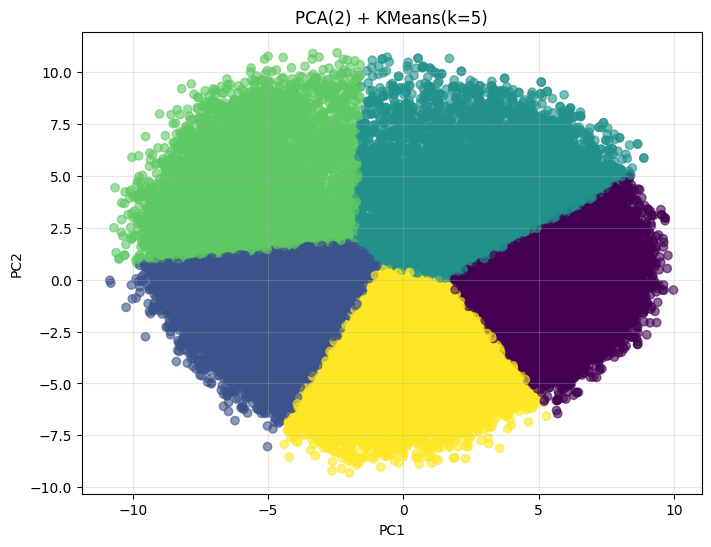

In [113]:
# Graph
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca2[:, 0],
    X_pca2[:, 1],
    c=labels2,
    alpha=0.6
)
plt.title(f"PCA(2) + KMeans(k=5)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(alpha=0.3)
plt.show()

# Conclusions

This project explored whether the authenticity of news articles can be predicted using only their textual content. We found that even simple features like title length or word count show strong signals, and that titles alone can offer reasonable predictive power. However, combining title and full-text embeddings (using GloVe and Doc2Vec) produced the most accurate results.
Through classification, clustering, and topic modeling, we gained insights into the structure and patterns of real and fake news. Our KMeans clustering showed that stylistic and thematic differences align with veracity. Finally, the implementation of a recommendation system, based on clustering, that suggests reliable articles when fake ones are detected adds value for users.
Overall, lightweight models based on minimal input can still be effective, making this approach suitable for scalable and efficient misinformation detection.
